# NAME - PARIKSHIT SAHU
## LETSGROWMORE INTERSHIP PROJECT
### INTERMEDIATE LEVEL

#### THE TASK OF THIS PROJECT IS TO FIND OUT THE HOT ZONE OF TERRORISM

#### IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("D:\LETSGROWMORE\globalterrorismdb_0718dist.csv",encoding='latin1')
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_22140\2542613475.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\LETSGROWMORE\globalterrorismdb_0718dist.csv",encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#### DESCRIBING THE DATASET 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [4]:
df.shape

(181691, 135)

In [5]:
for i in df.columns:
    print(i,end=" , ")

eventid , iyear , imonth , iday , approxdate , extended , resolution , country , country_txt , region , region_txt , provstate , city , latitude , longitude , specificity , vicinity , location , summary , crit1 , crit2 , crit3 , doubtterr , alternative , alternative_txt , multiple , success , suicide , attacktype1 , attacktype1_txt , attacktype2 , attacktype2_txt , attacktype3 , attacktype3_txt , targtype1 , targtype1_txt , targsubtype1 , targsubtype1_txt , corp1 , target1 , natlty1 , natlty1_txt , targtype2 , targtype2_txt , targsubtype2 , targsubtype2_txt , corp2 , target2 , natlty2 , natlty2_txt , targtype3 , targtype3_txt , targsubtype3 , targsubtype3_txt , corp3 , target3 , natlty3 , natlty3_txt , gname , gsubname , gname2 , gsubname2 , gname3 , gsubname3 , motive , guncertain1 , guncertain2 , guncertain3 , individual , nperps , nperpcap , claimed , claimmode , claimmode_txt , claim2 , claimmode2 , claimmode2_txt , claim3 , claimmode3 , claimmode3_txt , compclaim , weaptype1 , wea

In [6]:
df = df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [7]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [8]:
df.head()

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [9]:
df.shape

(181691, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   State        181270 non-null  object 
 6   City         181256 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Location     55495 non-null   object 
 10  Summary      115562 non-null  object 
 11  Attack Type  181691 non-null  object 
 12  Target Type  181691 non-null  object 
 13  Group Name   181691 non-null  object 
 14  Motive       50561 non-null   object 
 15  Weapon Type  181691 non-null  object 
 16  Killed       171378 non-null  float64
 17  Wounded      165380 non-null  float64
 18  Add Notes    28289 non-n

In [11]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
State             421
City              435
Latitude         4556
Longitude        4557
Location       126196
Summary         66129
Attack Type         0
Target Type         0
Group Name          0
Motive         131130
Weapon Type         0
Killed          10313
Wounded         16311
Add Notes      153402
dtype: int64

In [12]:
df["Killed"] = df["Killed"].fillna(0)
df["Wounded"] = df["Wounded"].fillna(0)
df["Casuality"] = df["Killed"] + df["Wounded"]

In [13]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casuality
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


#### VISULALIZING THE DATA BY PLOTTING GRAPHS

## YEARWISE ATTACKS ON THE PEOPLE

In [19]:
yc = df[["Year","Attack Type"]].groupby("Year").value_counts(dropna=False).sort_index().reset_index()
yc.head()

,Year,Attack Type,count
0,1970,Armed Assault,61
1,1970,Assassination,22
2,1970,Bombing/Explosion,333
3,1970,Facility/Infrastructure Attack,174
4,1970,Hijacking,11


In [27]:
attacks = df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"})
attacks.head()

,Attacks,count
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581


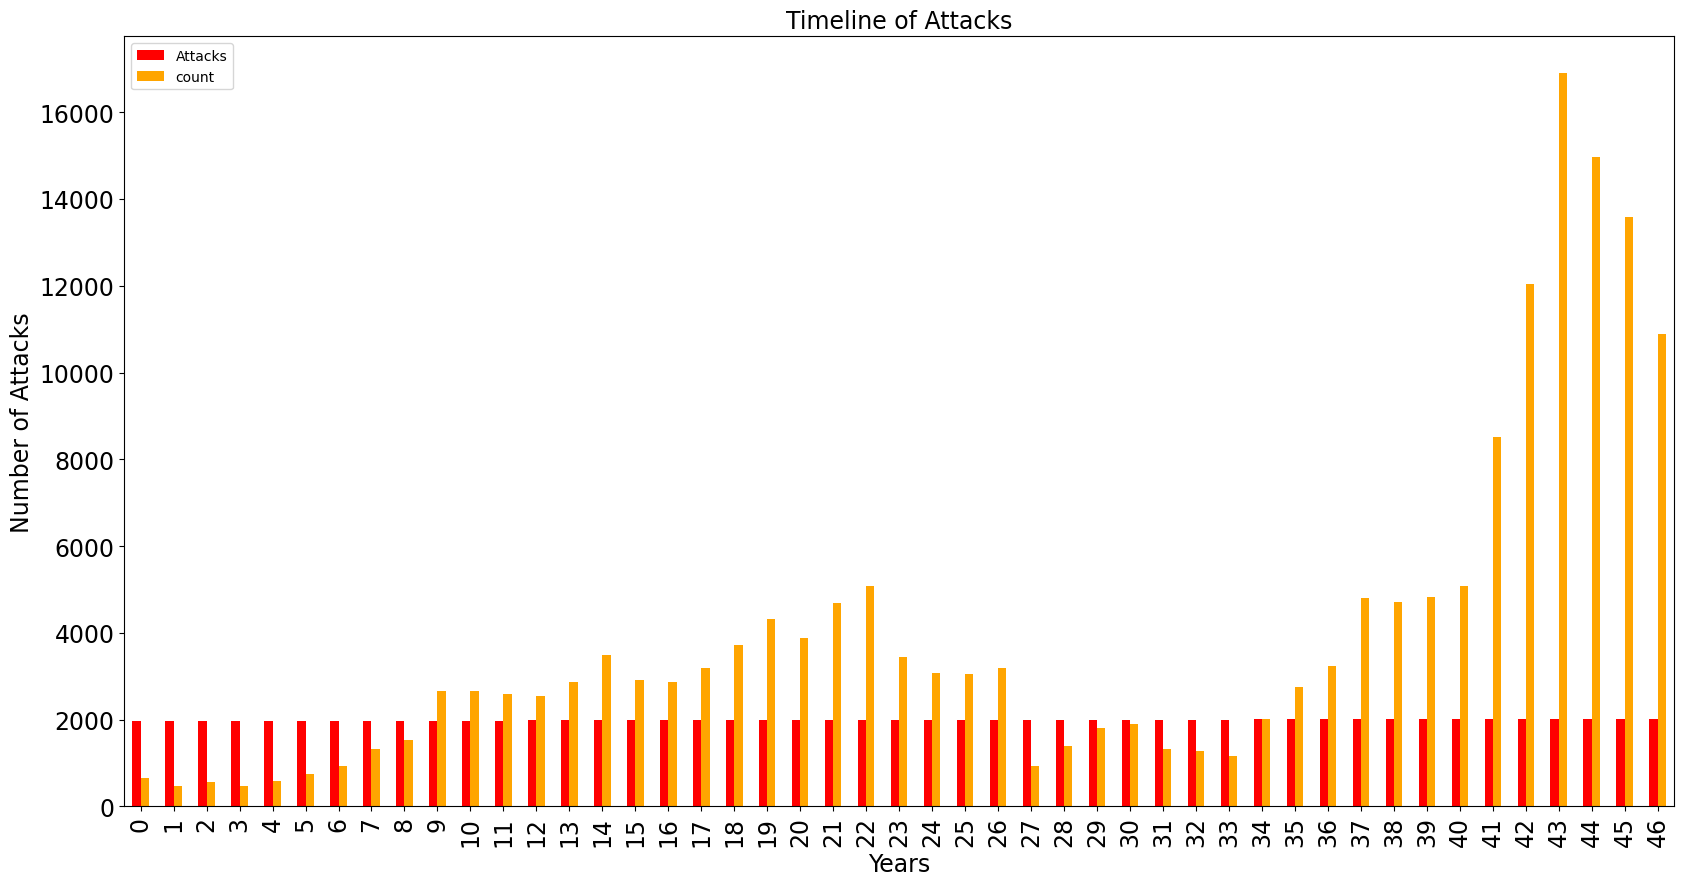

In [40]:
attacks.plot(kind="bar",color=["red","orange"],figsize=(20,10),fontsize=17)
plt.title("Timeline of Attacks",fontsize=17)
plt.xlabel("Years",fontsize=17)
plt.ylabel("Number of Attacks",fontsize=17)
plt.show()

In [38]:
year = df[["Year","Casuality"]].groupby("Year").sum()
year.head()

,Casuality
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


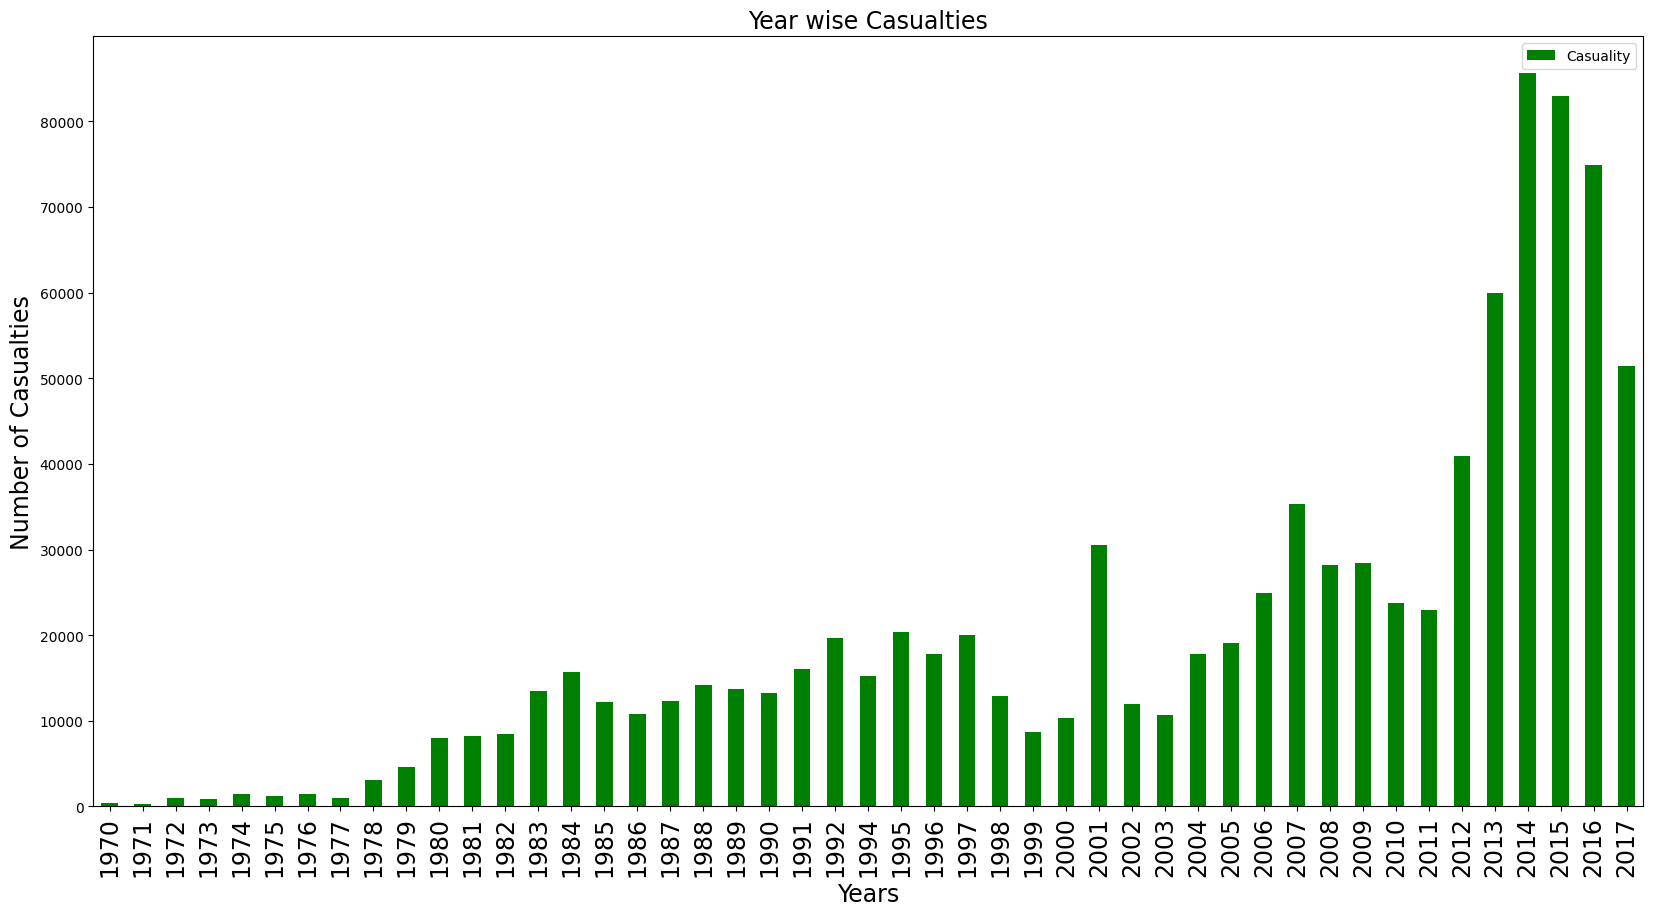

In [41]:
year.plot(kind="bar",color="green",figsize=(20,10))
plt.title("Year wise Casualties",fontsize=17)
plt.xlabel("Years",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Casualties",fontsize=17)
plt.show()

#### PEOPLE KILLED IN EACH YEAR

In [42]:
yearkilled = df[["Year","Killed"]].groupby("Year").sum()
yearkilled.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


#### PEOPLE WOUNDED ACCORDING TO THE REGION

In [43]:
yearwounded=df[["Year","Wounded"]].groupby("Year").sum()
yearwounded.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


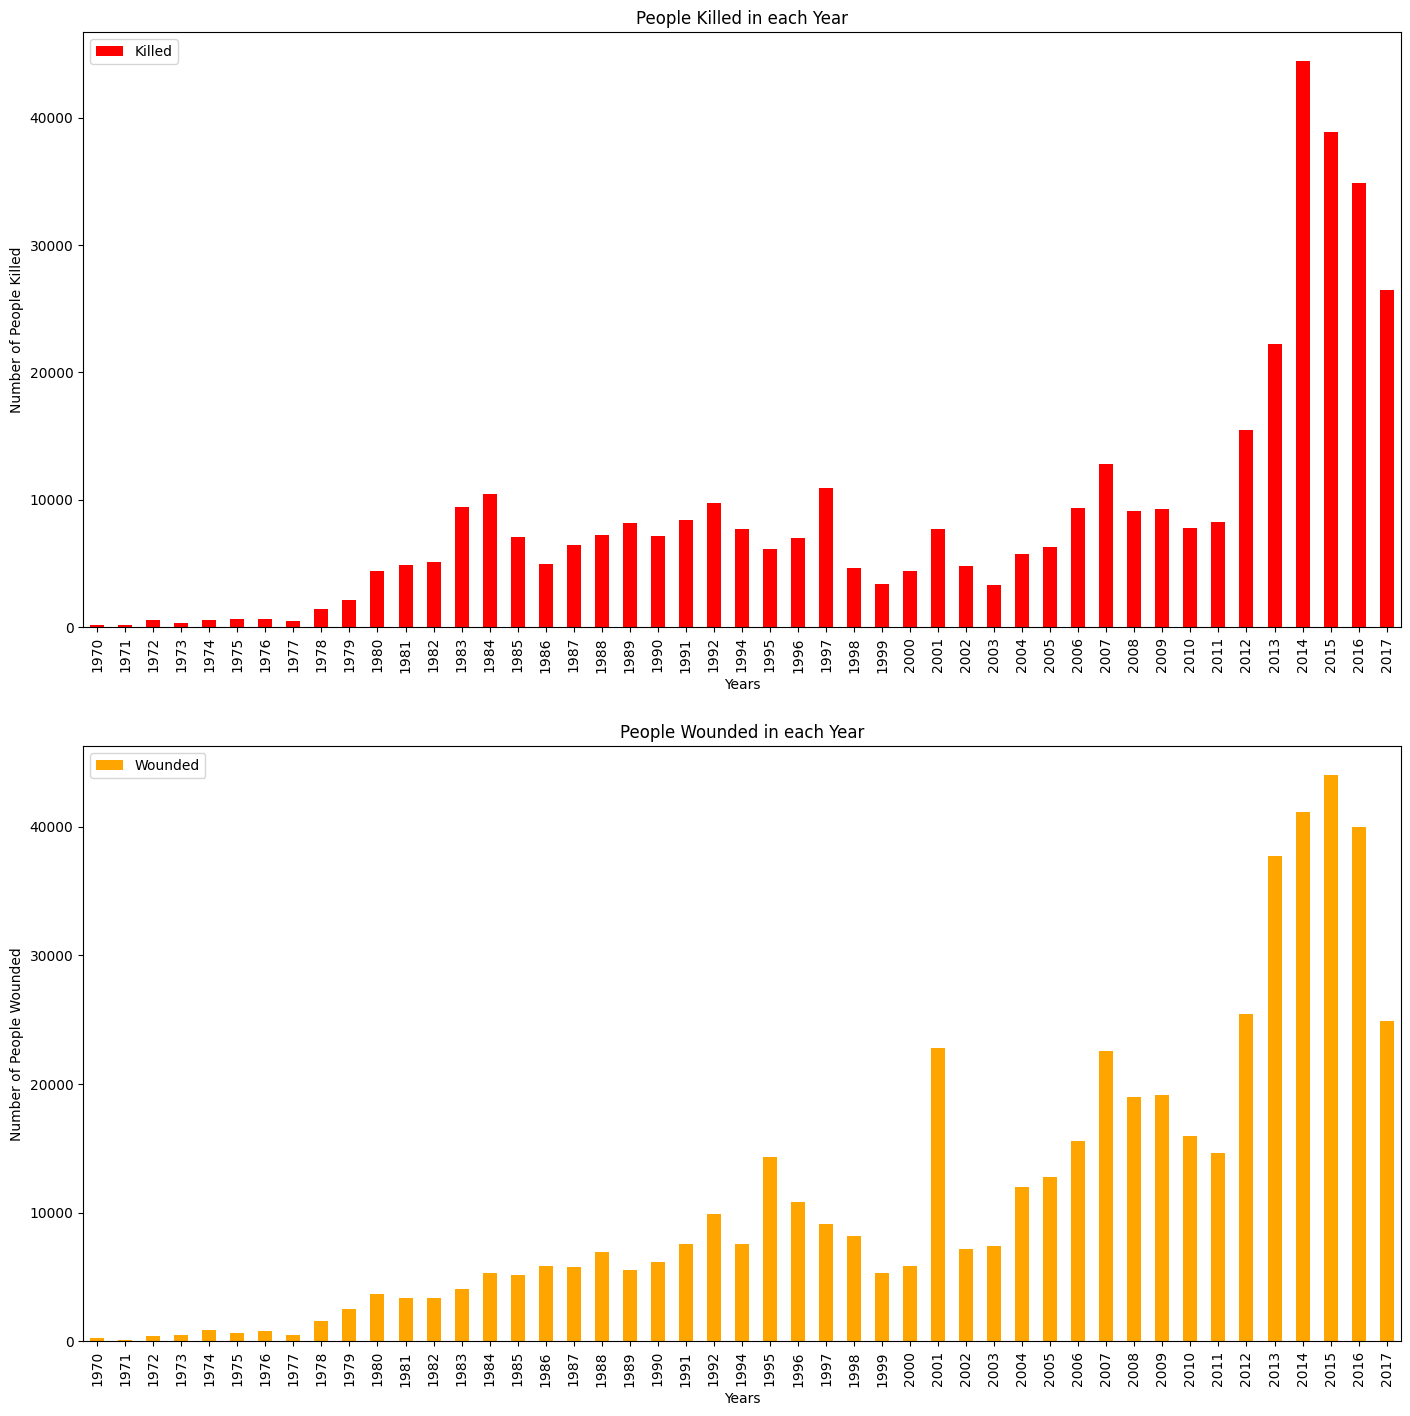

In [45]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

yearkilled.plot(kind="bar",color="red",figsize=(17,17),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed") 

yearwounded.plot(kind="bar",color="orange",figsize=(17,17),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

## REGIONWISE ATTACKS ON THE PEOPLE

In [46]:
region = pd.crosstab(df.Year,df.Region)
region.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


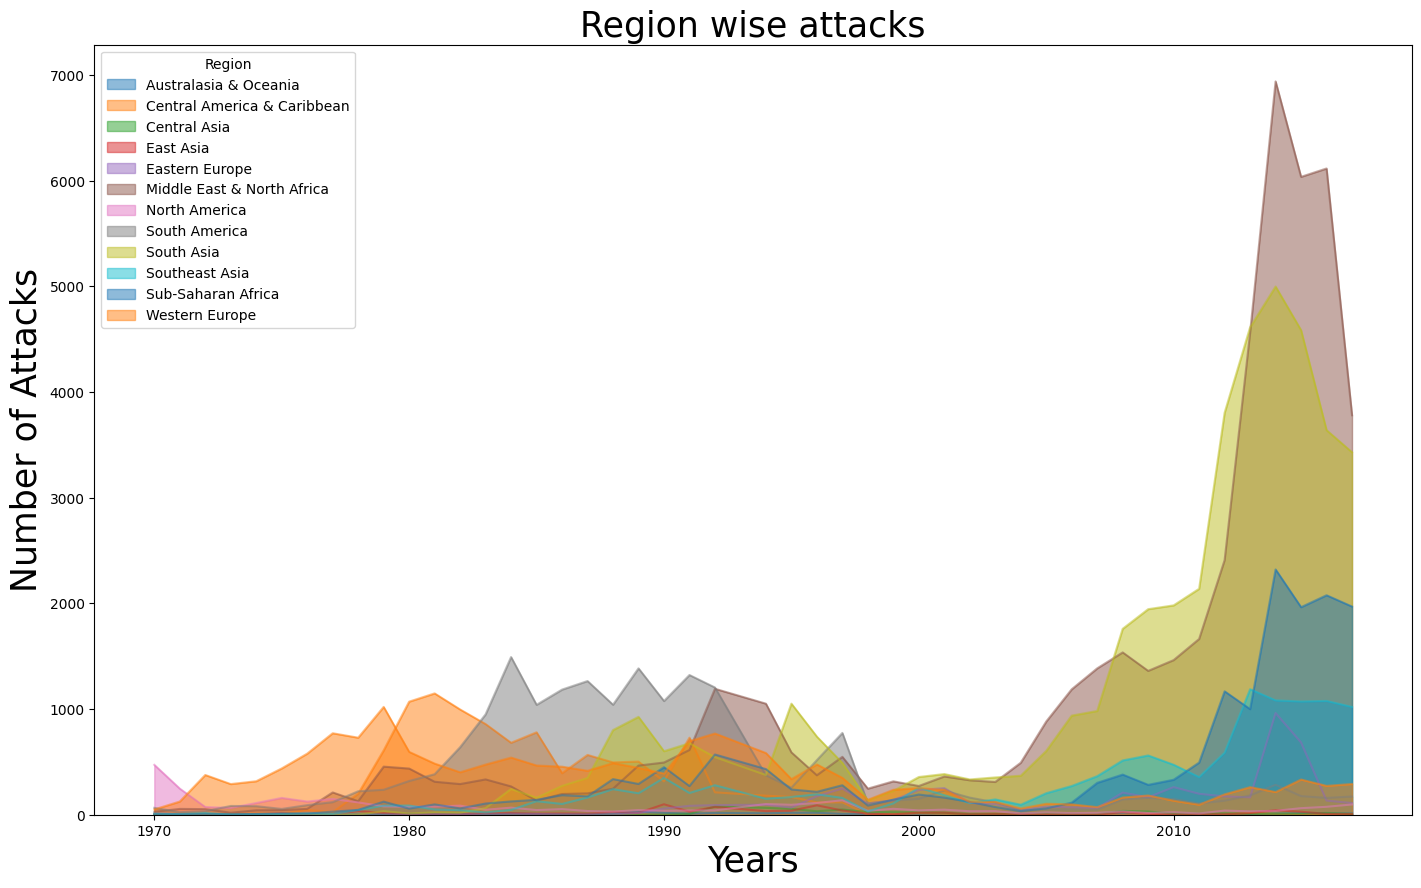

In [51]:
region.plot(kind="area", stacked=False, alpha=0.5,figsize=(17,10))
plt.title("Region wise attacks",fontsize=25)
plt.xlabel("Years",fontsize=25)
plt.ylabel("Number of Attacks",fontsize=25)
plt.show()

In [52]:
regtranspose = region.transpose()
regtranspose["Total"]=regtranspose.sum(axis=1)
ra=regtranspose["Total"].sort_values(ascending=False)
ra

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

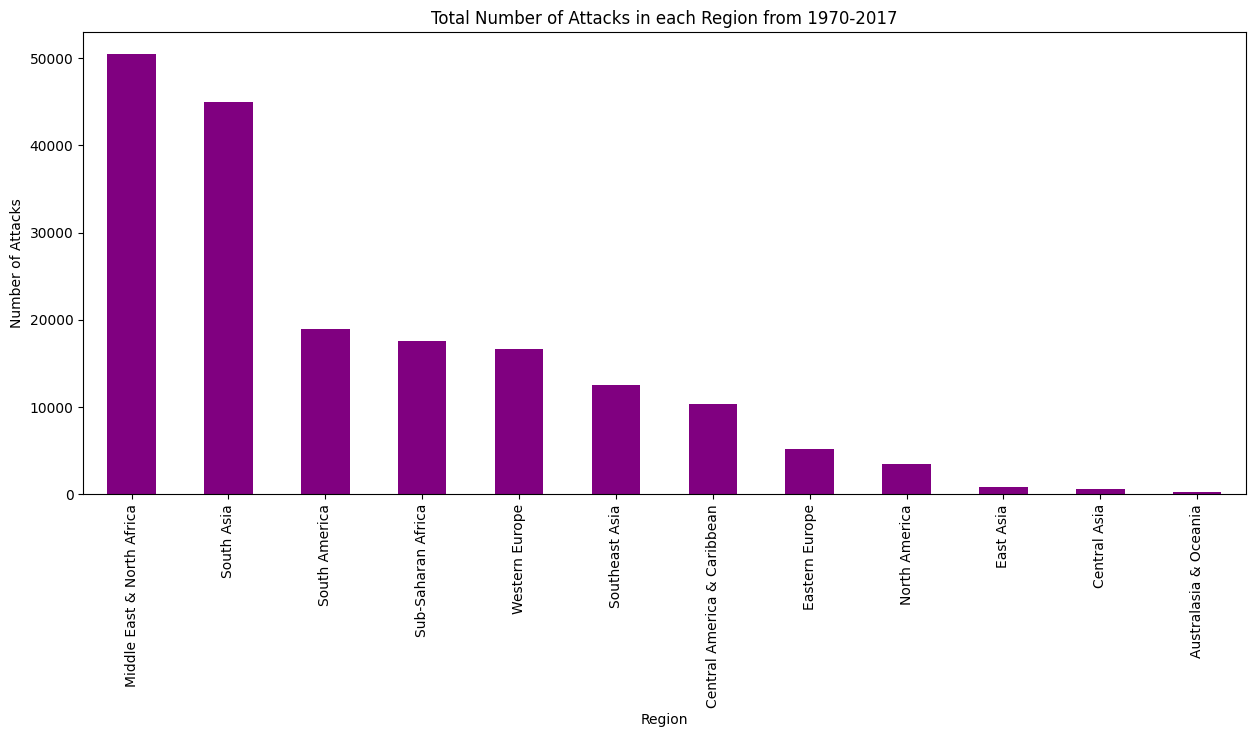

In [55]:
ra.plot(kind="bar",color="purple",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

In [57]:
rc = df[["Region","Casuality"]].groupby("Region").sum().sort_values(by="Casuality",ascending=False)
rc

,Casuality
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


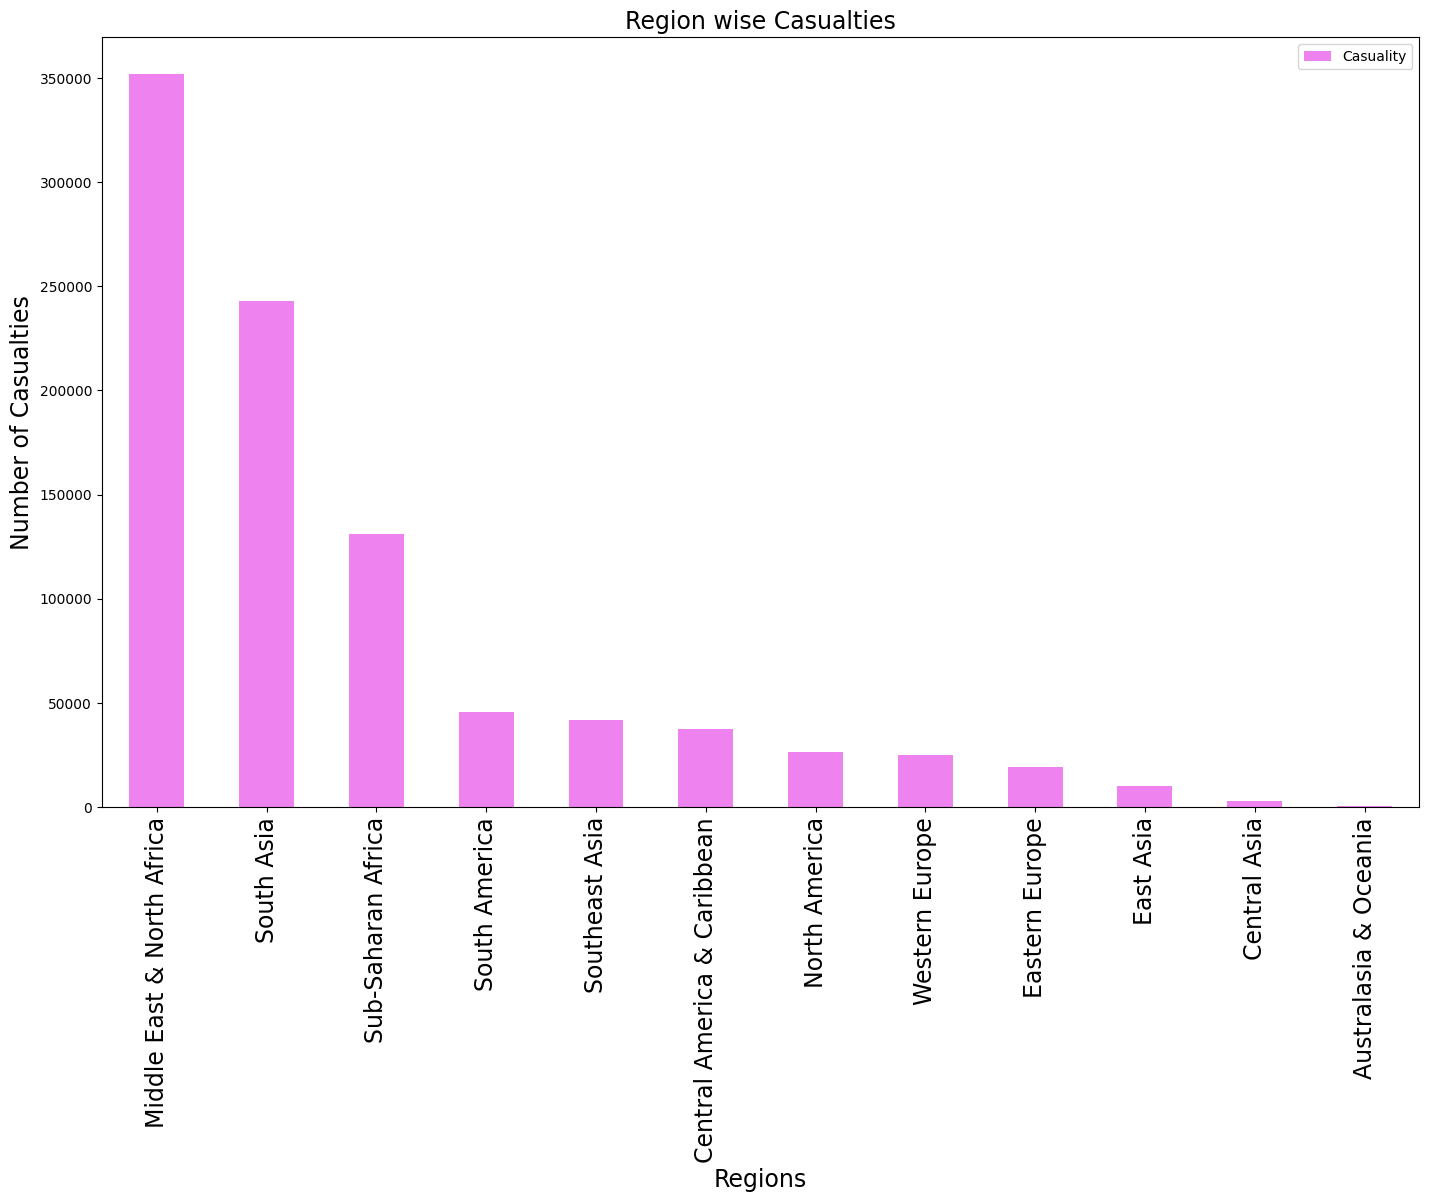

In [59]:
rc.plot(kind="bar",color="violet",figsize=(17,10))
plt.title("Region wise Casualties",fontsize=17)
plt.xlabel("Regions",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Casualties",fontsize=17)
plt.show()

## PEOPLE KILLED IN EACH REGION

In [63]:
regionkilled = df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
regionkilled

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


## PEOPLE WOUNDED IN EACH REGION

In [64]:
regionwounded = df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
regionwounded

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


Text(0, 0.5, 'Number of People Wounded')

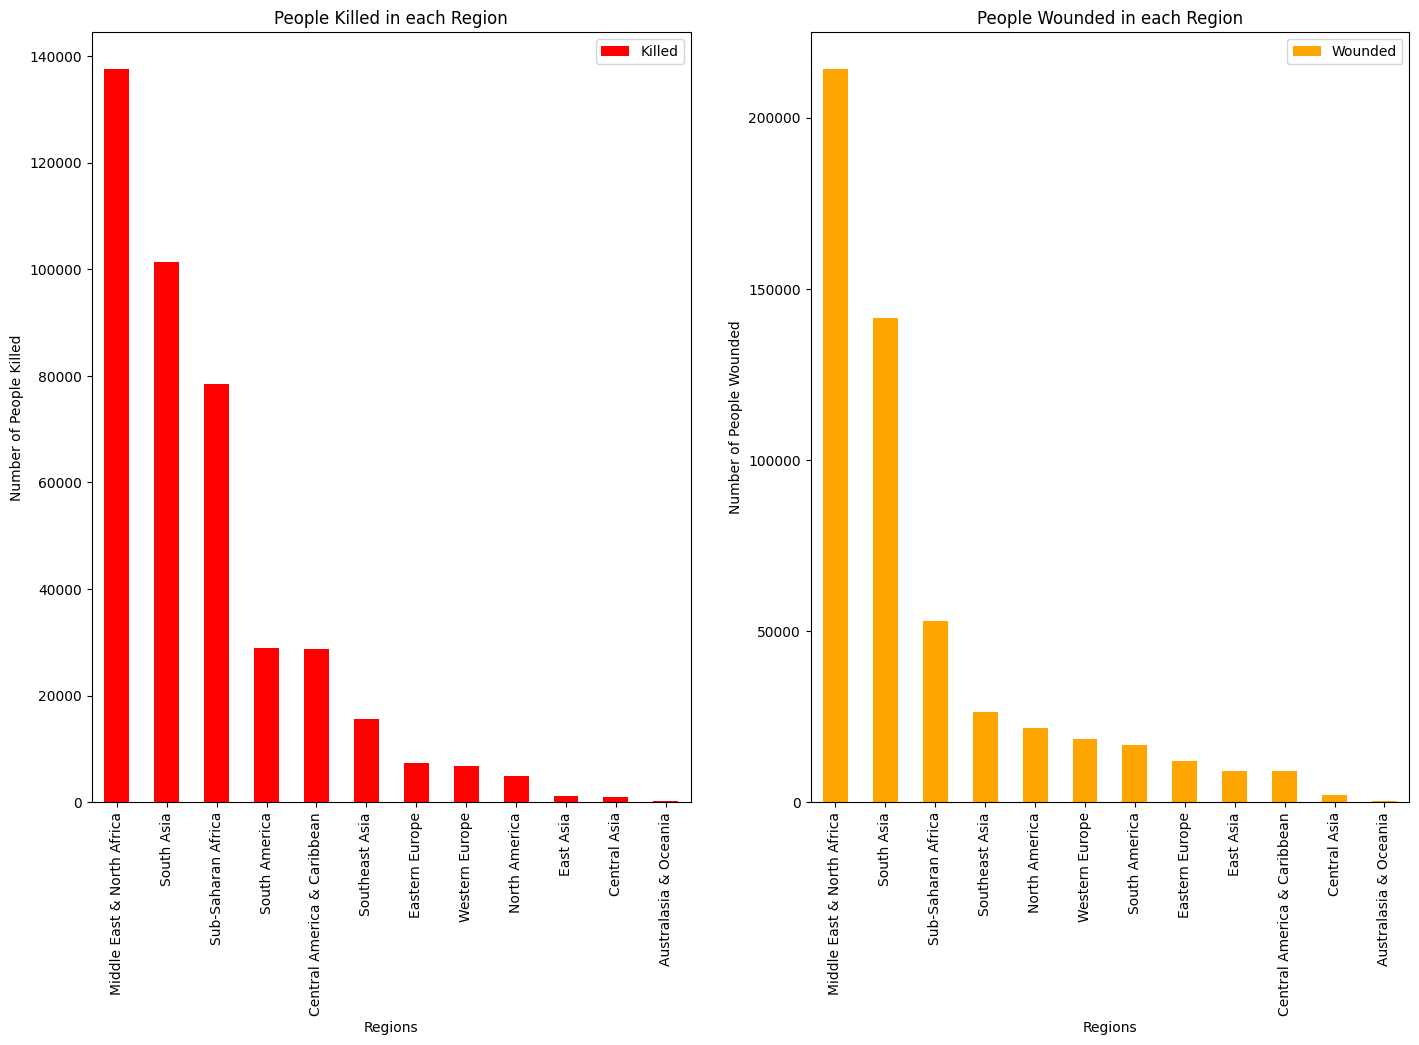

In [65]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

regionkilled.plot(kind="bar",color="red",figsize=(17,10),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

regionwounded.plot(kind="bar",color="orange",figsize=(17,10),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")


## COUNTRYWISE ATTACKS ON THE PEOPLE

In [66]:
ct = df["Country"].value_counts().head(10)
ct

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: count, dtype: int64

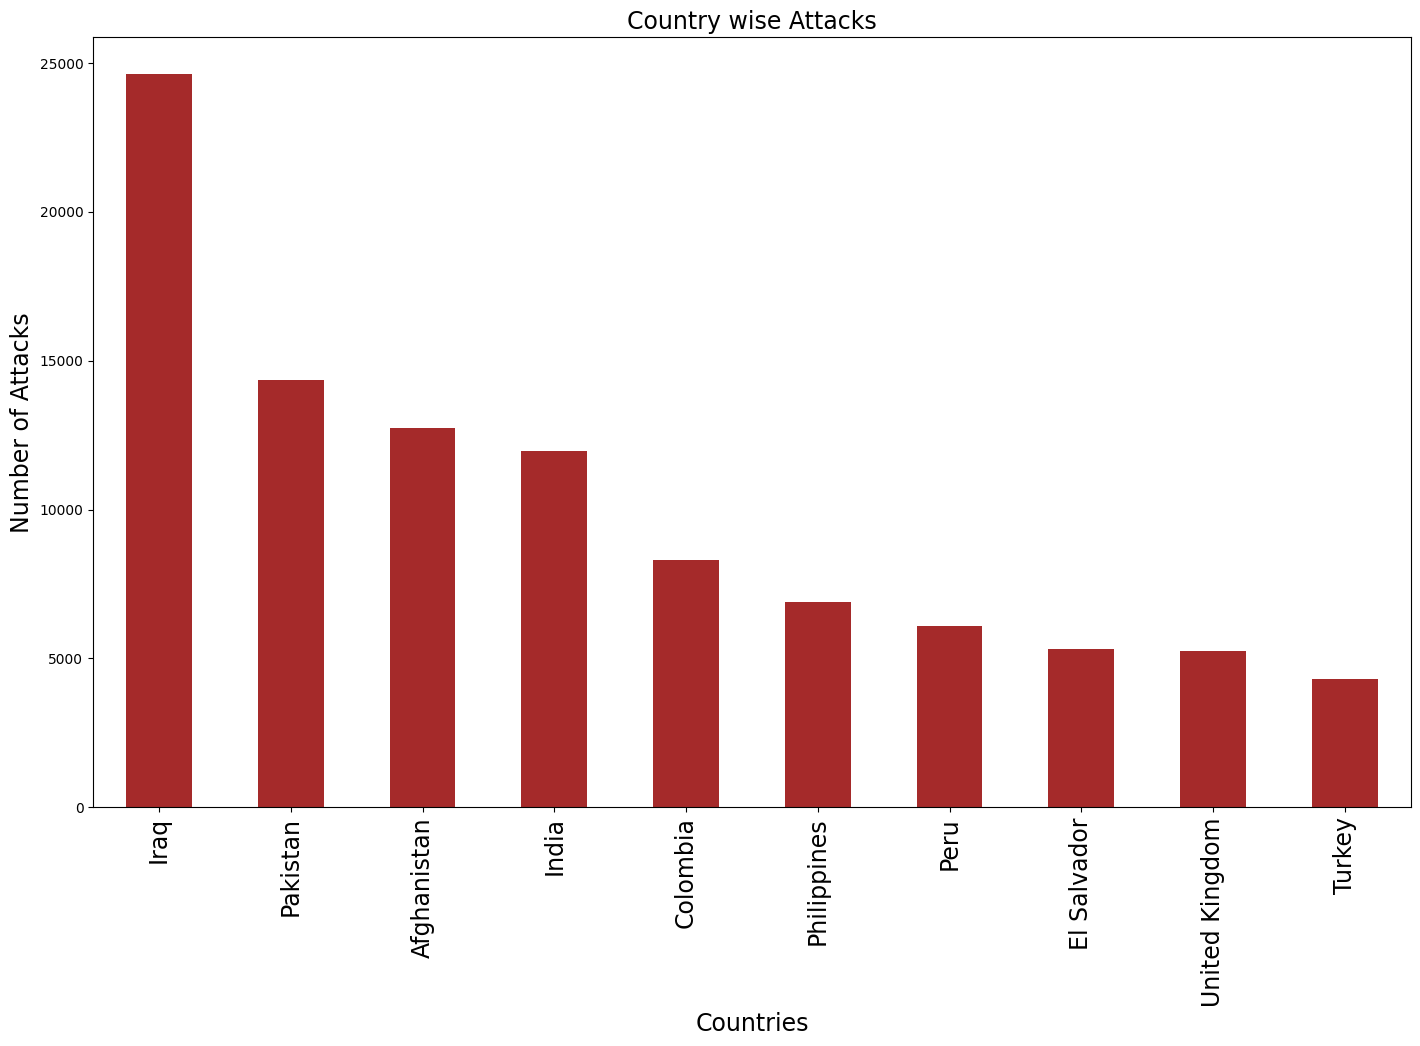

In [70]:
ct.plot(kind="bar",color="brown",figsize=(17,10))
plt.title("Country wise Attacks",fontsize=17) 
plt.xlabel("Countries",fontsize=17) 
plt.xticks(fontsize=17)
plt.ylabel("Number of Attacks",fontsize=17) 
plt.show()

In [72]:
cnc = df[["Country","Casuality"]].groupby("Country").sum().sort_values(by="Casuality",ascending=False)
cnc.head(10)

,Casuality
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
Sri Lanka,31091.0
Syria,29338.0
Colombia,25026.0
United States,24473.0


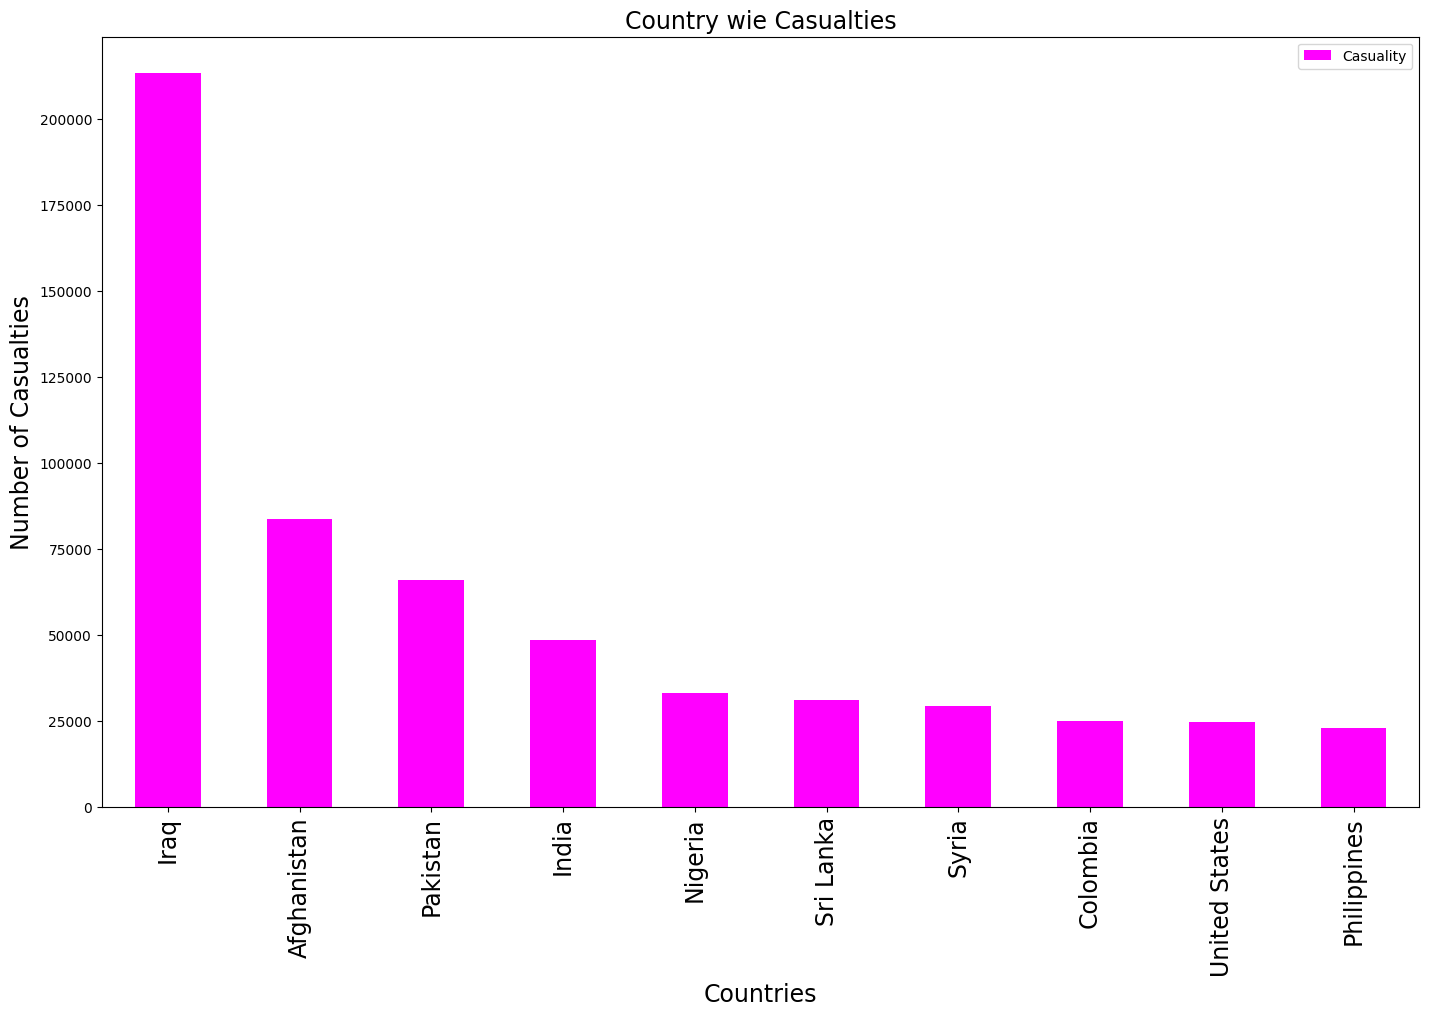

In [74]:
cnc[:10].plot(kind="bar",color="magenta",figsize=(17,10))
plt.title("Country wie Casualties",fontsize=17)
plt.xlabel("Countries",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Casualties",fontsize=17)
plt.show()

## PEOPLE KILLED IN EACH COUNTRY

In [75]:
countrykilled = df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
countrykilled.head(10)

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


## PEOPLE WOUNDED IN EACH COUNTRY

In [76]:
countrywounded = df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
countrywounded.head(10)

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


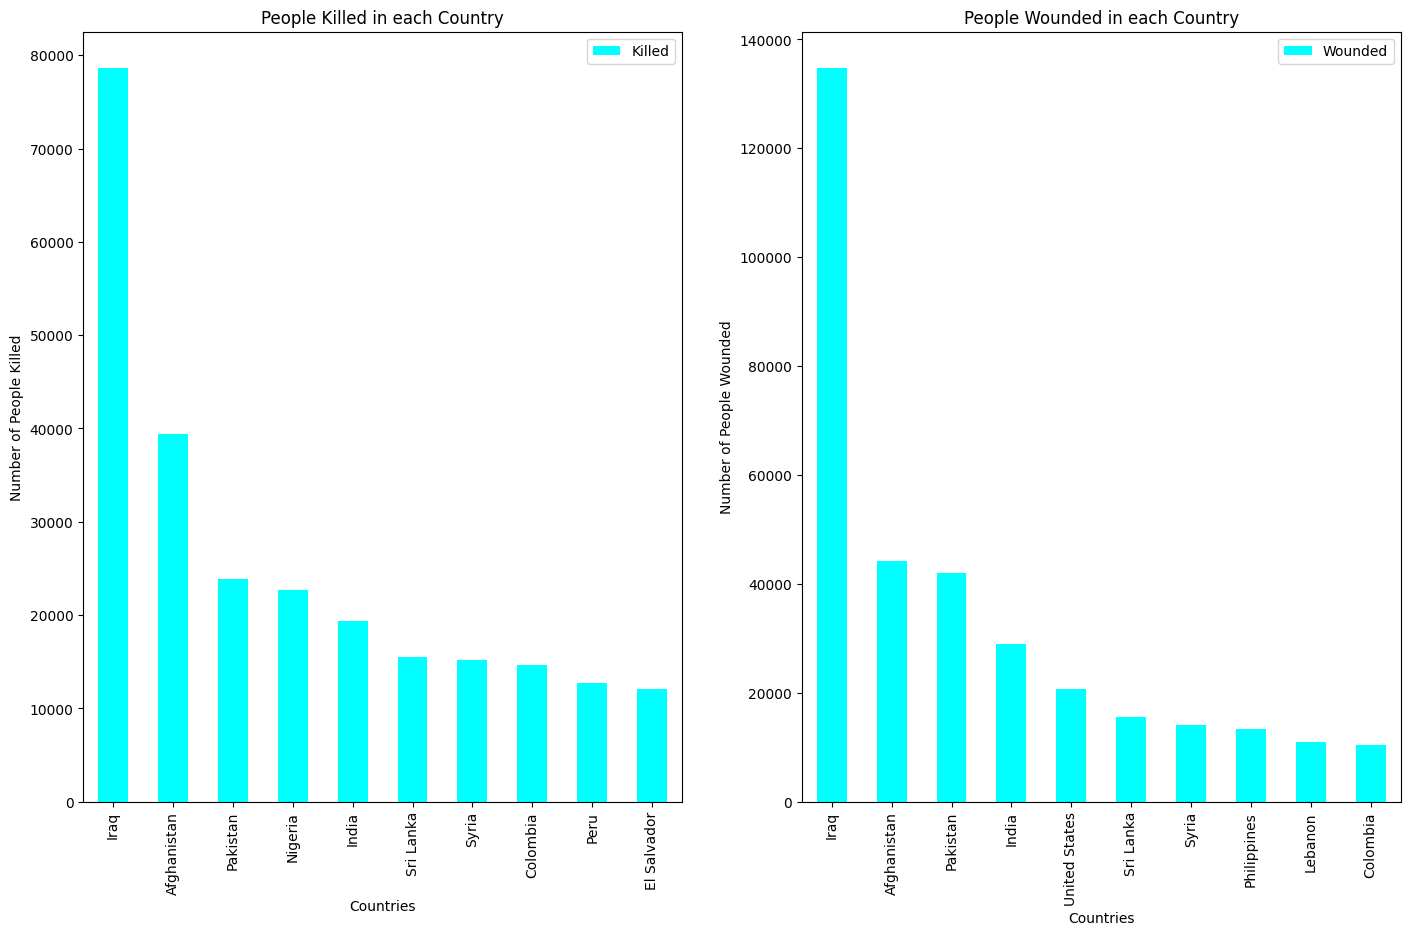

In [78]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

countrykilled[:10].plot(kind="bar",color="cyan",figsize=(17,10),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

countrywounded[:10].plot(kind="bar",color="cyan",figsize=(17,10),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()


## CITYWISE ATTACKS ON THE PEOPLE

In [79]:
city = df["City"].value_counts()[1:11]
city

City
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: count, dtype: int64

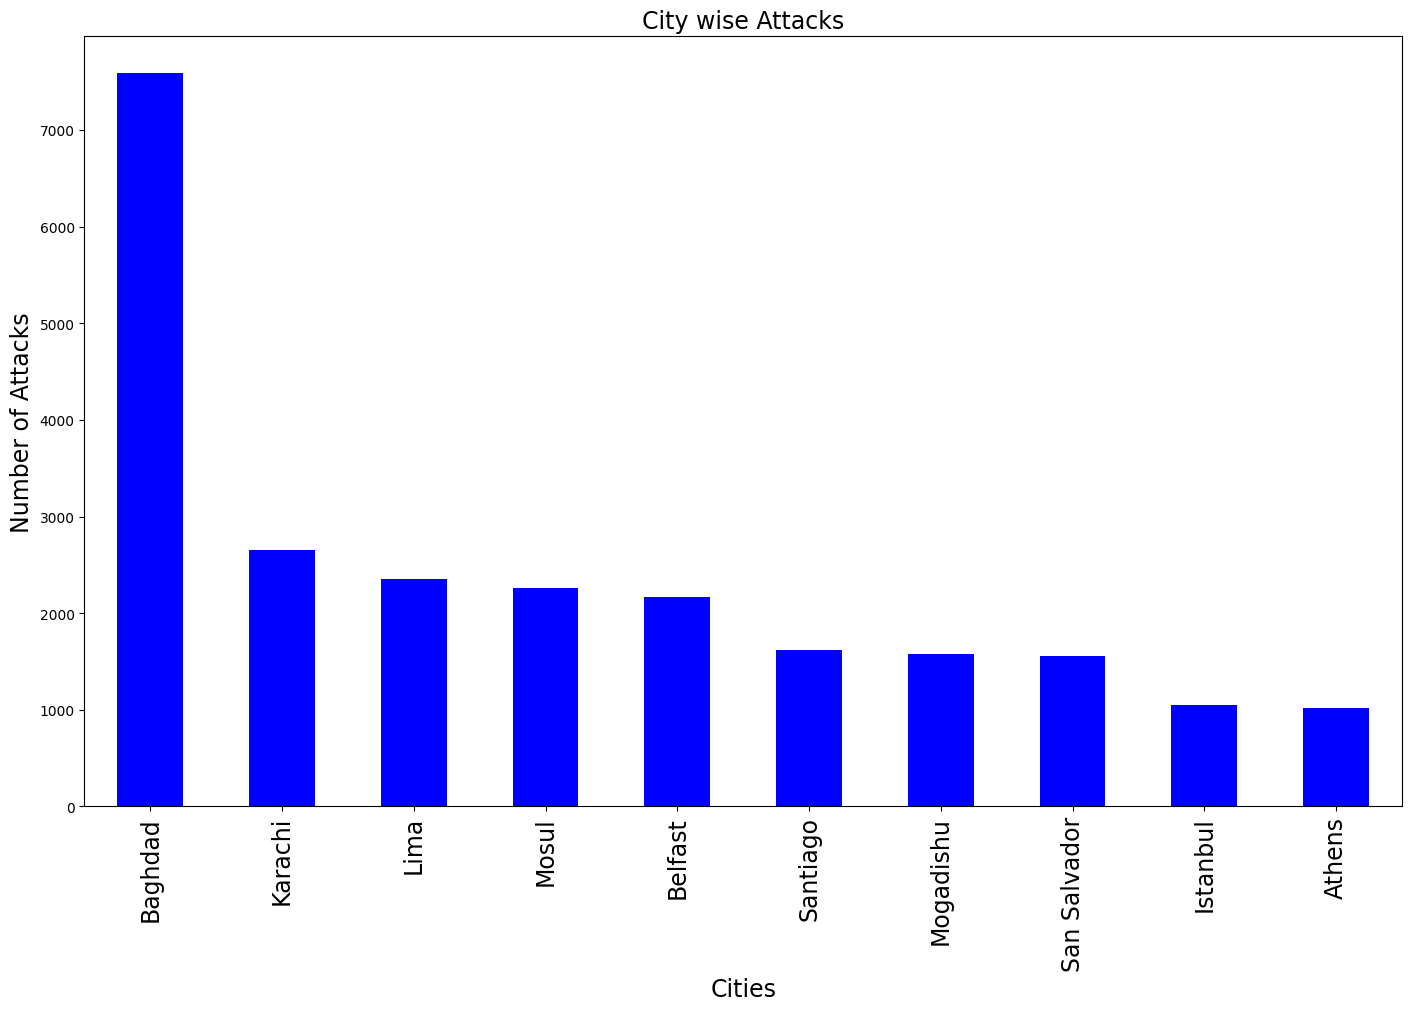

In [80]:
city.plot(kind="bar",color="blue",figsize=(17,10))
plt.title("City wise Attacks",fontsize=17)
plt.xlabel("Cities",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Attacks",fontsize=17)
plt.show()

In [82]:
cc = df[["City","Casuality"]].groupby("City").sum().sort_values(by="Casuality",ascending=False).drop("Unknown")
cc.head(10)

,Casuality
City,
Baghdad,77876.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0
Colombo,5906.0


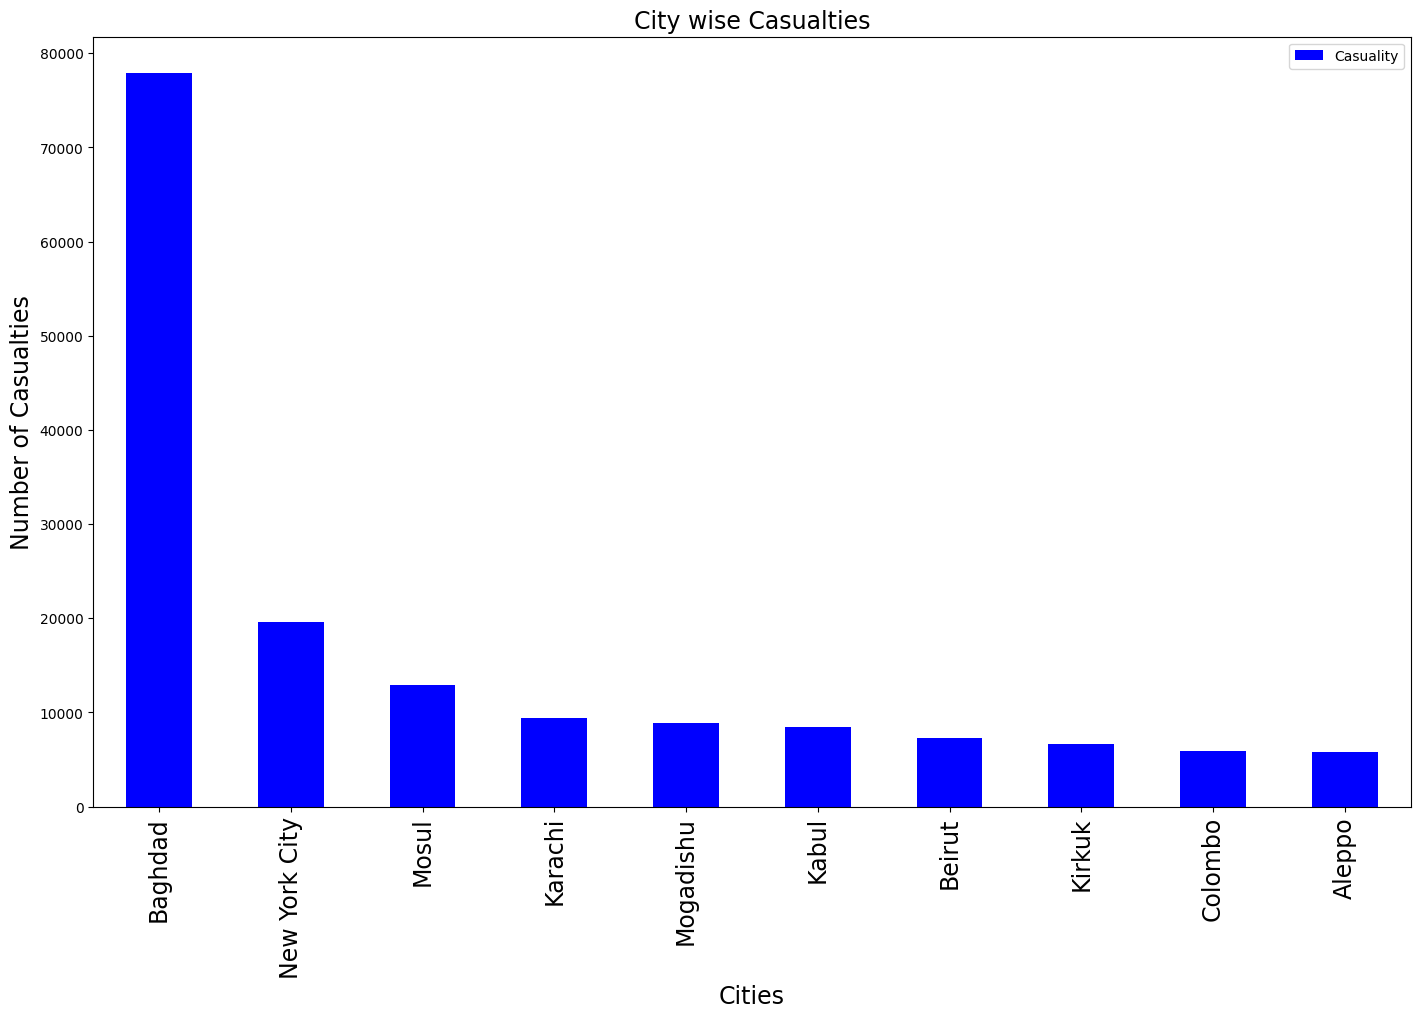

In [84]:
cc[:10].plot(kind="bar",color="blue",figsize=(17,10))
plt.title("City wise Casualties",fontsize=17)
plt.xlabel("Cities",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Casualties",fontsize=17)
plt.show()

## PEOPLE KILLED IN EACH CITY

In [85]:
citykilled = df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
citykilled.head(10)

,Killed
City,
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0
Maiduguri,2235.0


## PEOPLE WOUNDED IN EACH CITY

In [86]:
citywounded = df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
citywounded.head(10)

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Kabul,5973.0
Mosul,5787.0
Karachi,5688.0
Tokyo,5542.0
Beirut,5341.0
Nairobi,5024.0
Kirkuk,5008.0


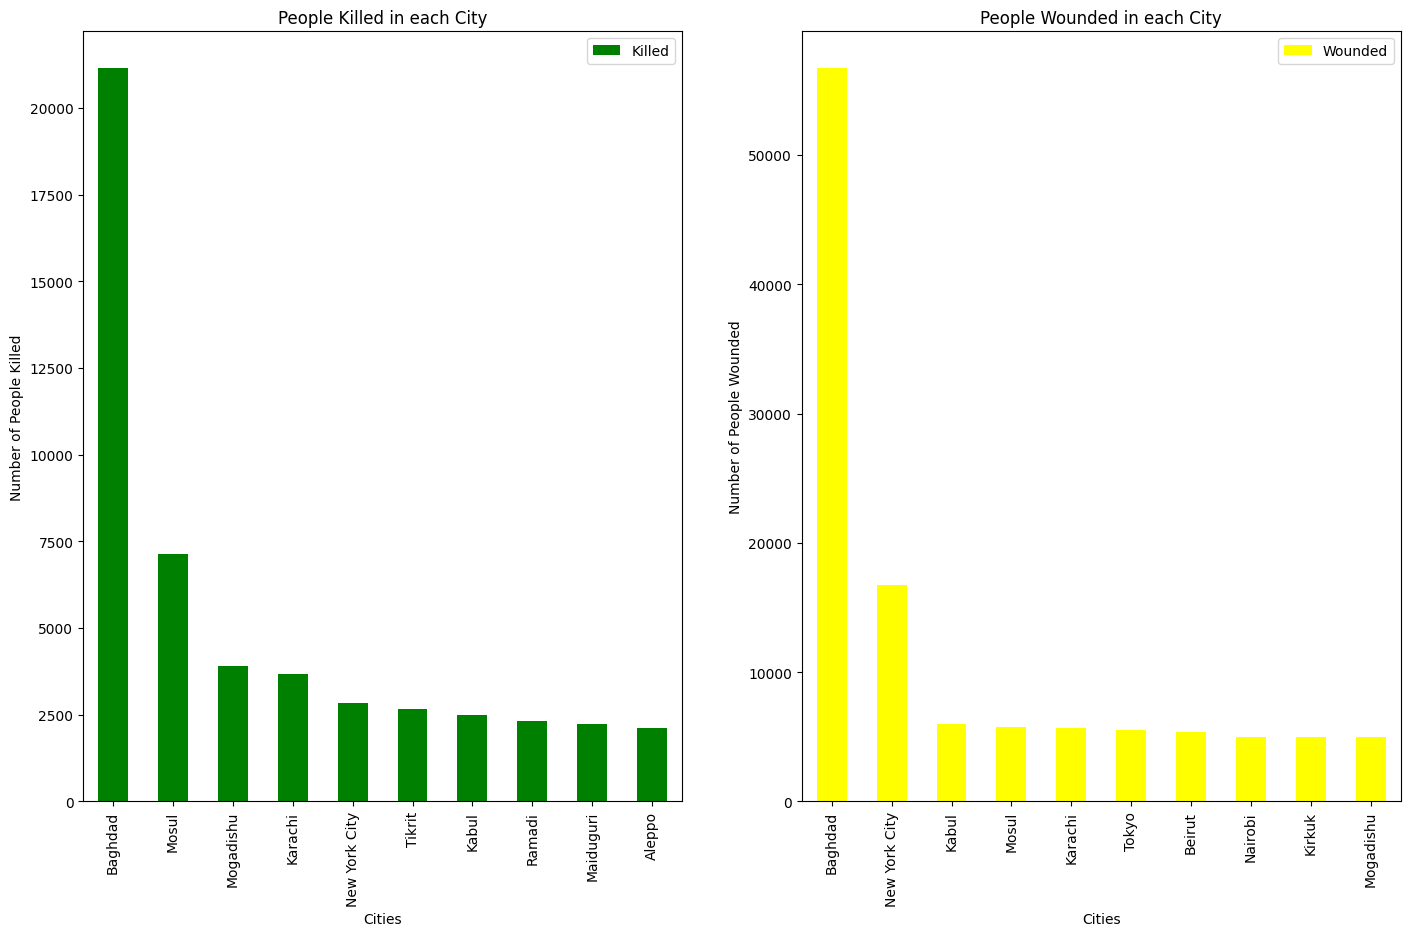

In [87]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

citykilled[:10].plot(kind="bar",color="green",figsize=(17,10),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

citywounded[:10].plot(kind="bar",color="yellow",figsize=(17,10),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

## GROUPWISE ATTACK ON THE PEOPLE

In [88]:
grp = df["Group Name"].value_counts()[1:10]
grp

Group Name
Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: count, dtype: int64

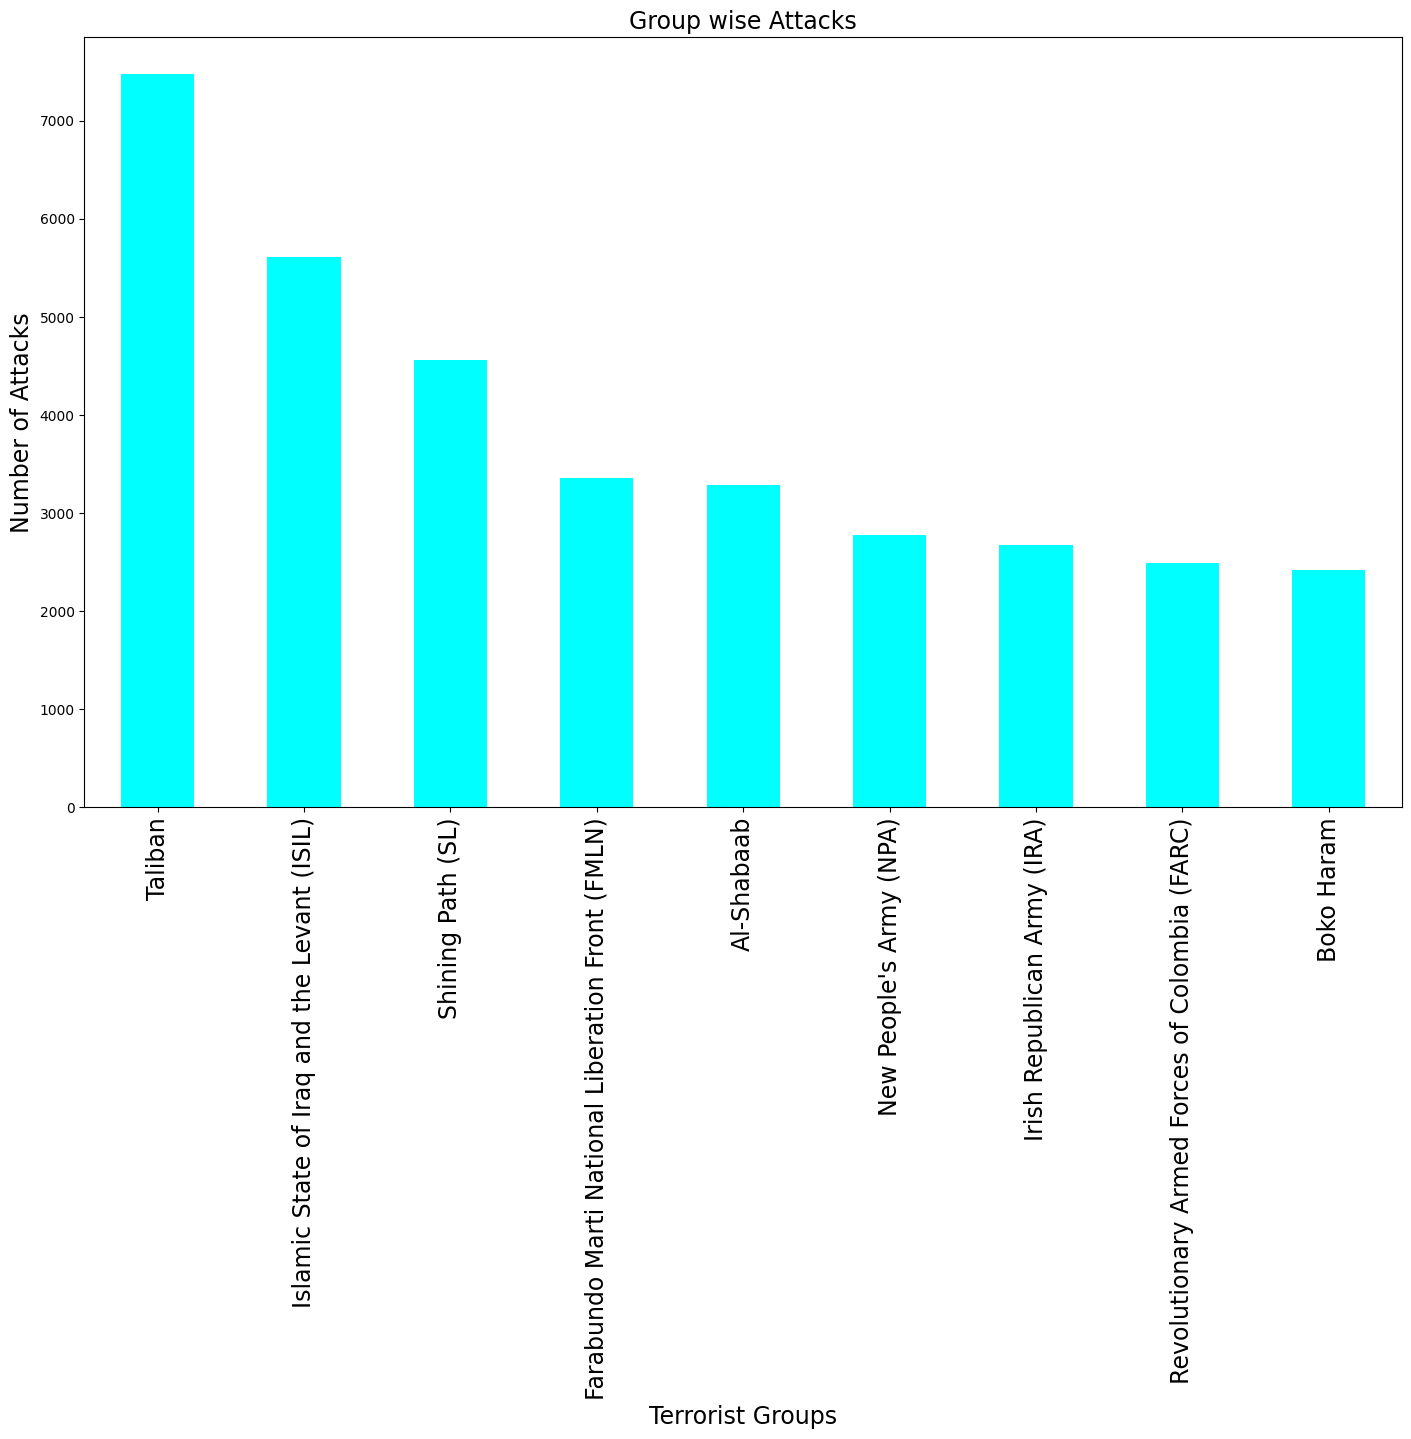

In [90]:
grp.plot(kind="bar",color="cyan",figsize=(17,10))
plt.title("Group wise Attacks",fontsize=17)
plt.xlabel("Terrorist Groups",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Attacks",fontsize=17)
plt.show()

In [92]:
gc = df[["Group Name","Casuality"]].groupby("Group Name").sum().sort_values(by="Casuality",ascending=False).drop("Unknown")
gc.head(10)

,Casuality
Group Name,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


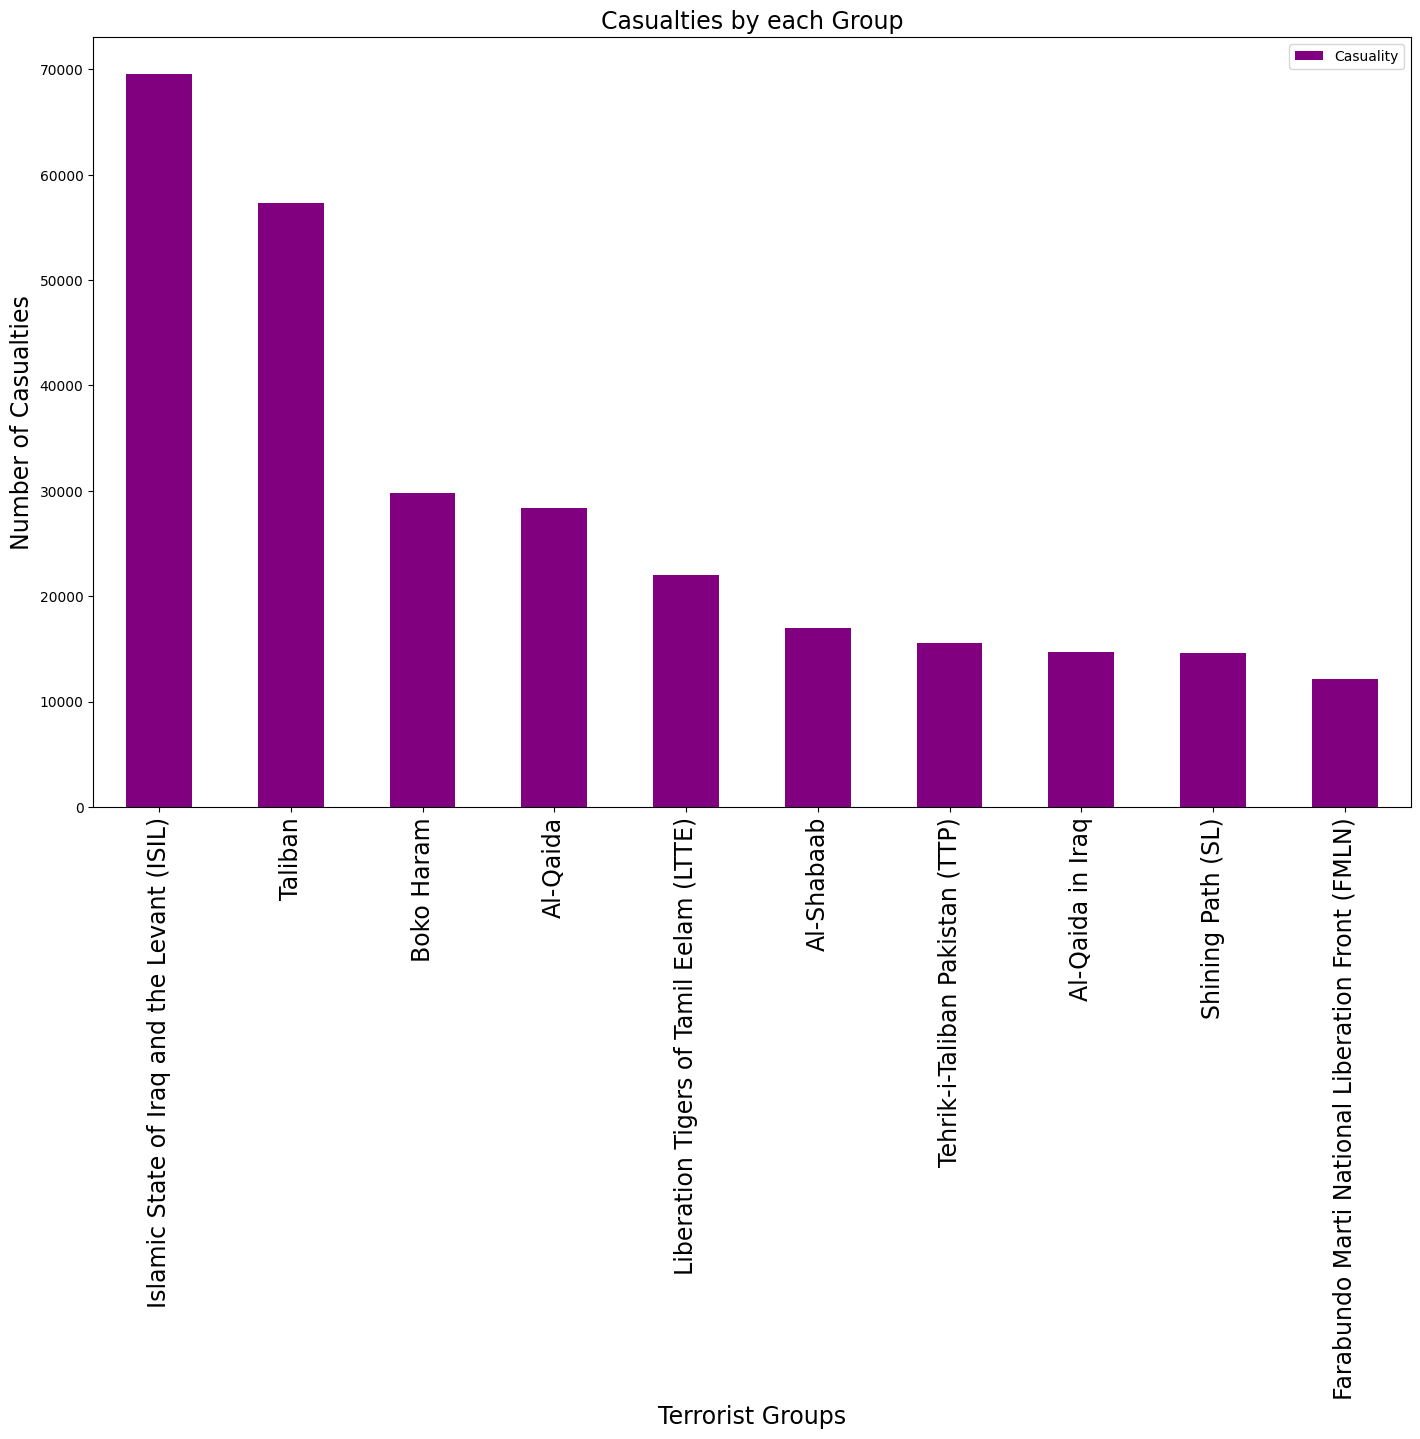

In [93]:
gc.head(10).plot(kind="bar",color="purple",figsize=(17,10))
plt.title("Casualties by each Group",fontsize=17)
plt.xlabel("Terrorist Groups",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Casualties",fontsize=17)
plt.show()

## PEOPLE KILLED BY EACH GROUP

In [94]:
groupkilled= df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
groupkilled.head(10)

,Killed
Group Name,
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0
Tehrik-i-Taliban Pakistan (TTP),6042.0


## PEOPLE WOUNDED BY EACH GROUP

In [95]:
groupwounded = df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
groupwounded.head(10)

,Wounded
Group Name,
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0
Aum Shinri Kyo,6003.0


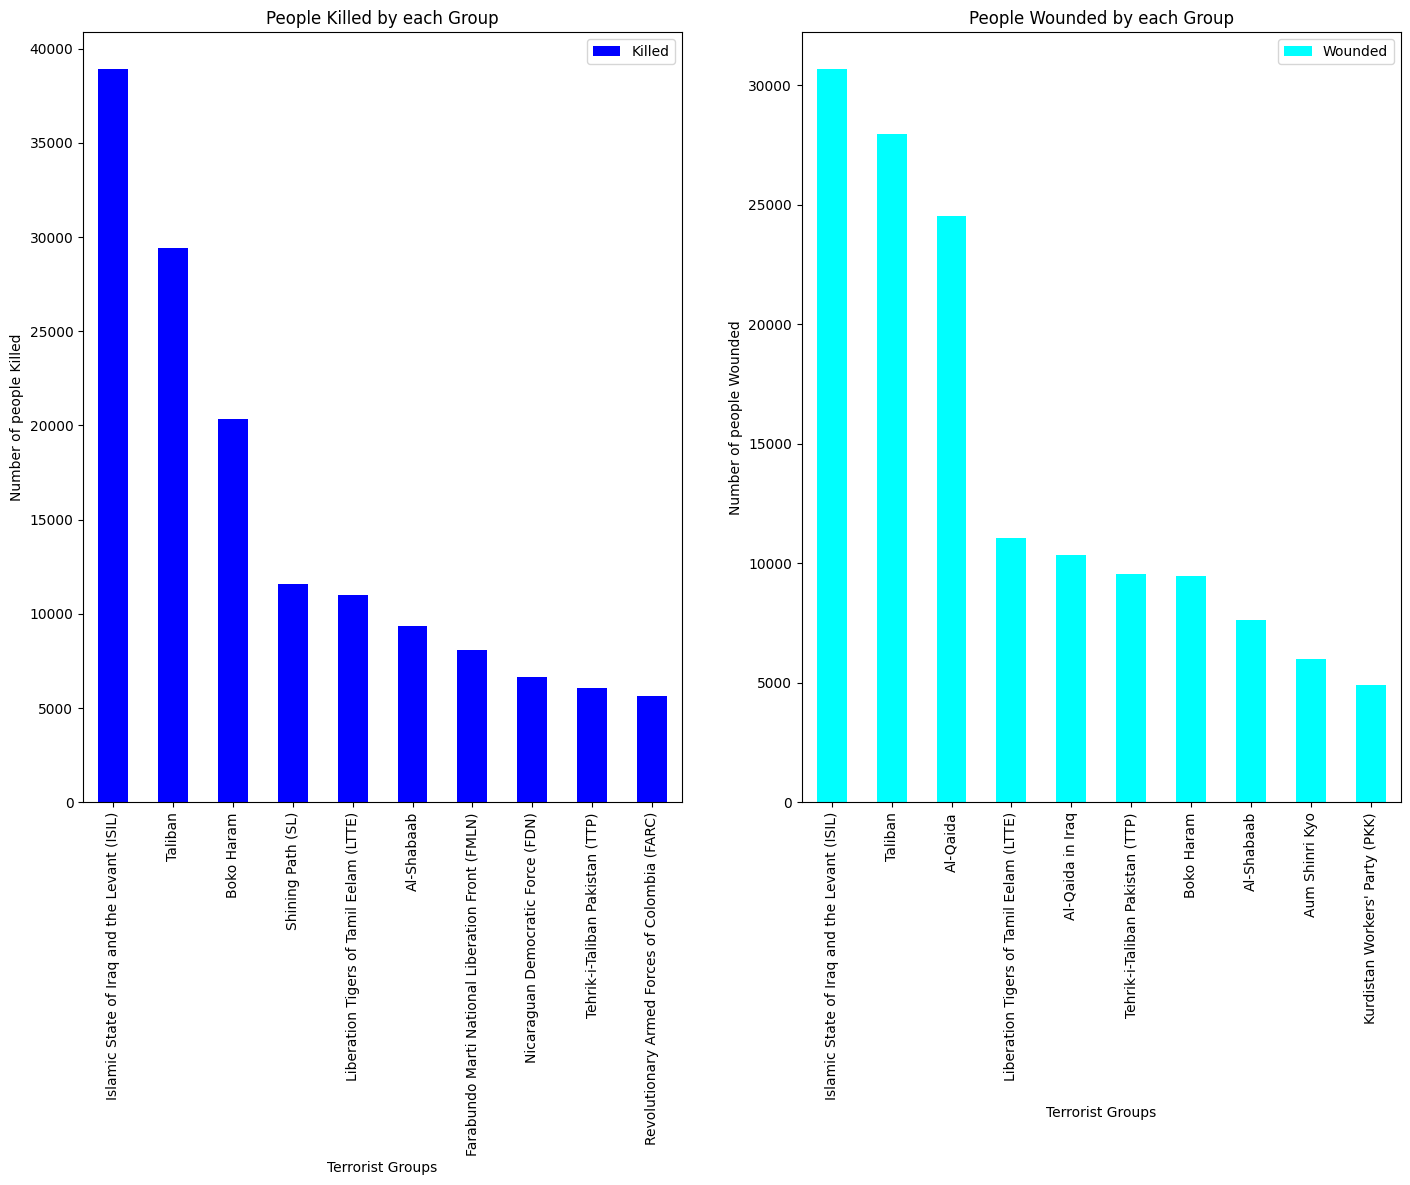

In [97]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
groupkilled[:10].plot(kind="bar",color="blue",figsize=(17,10),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

groupwounded[:10].plot(kind="bar",color="cyan",figsize=(17,10),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

## TYPEWISE ATTACKS ON THE PEOPLE

In [98]:
at=df["Attack Type"].value_counts()
at

Attack Type
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

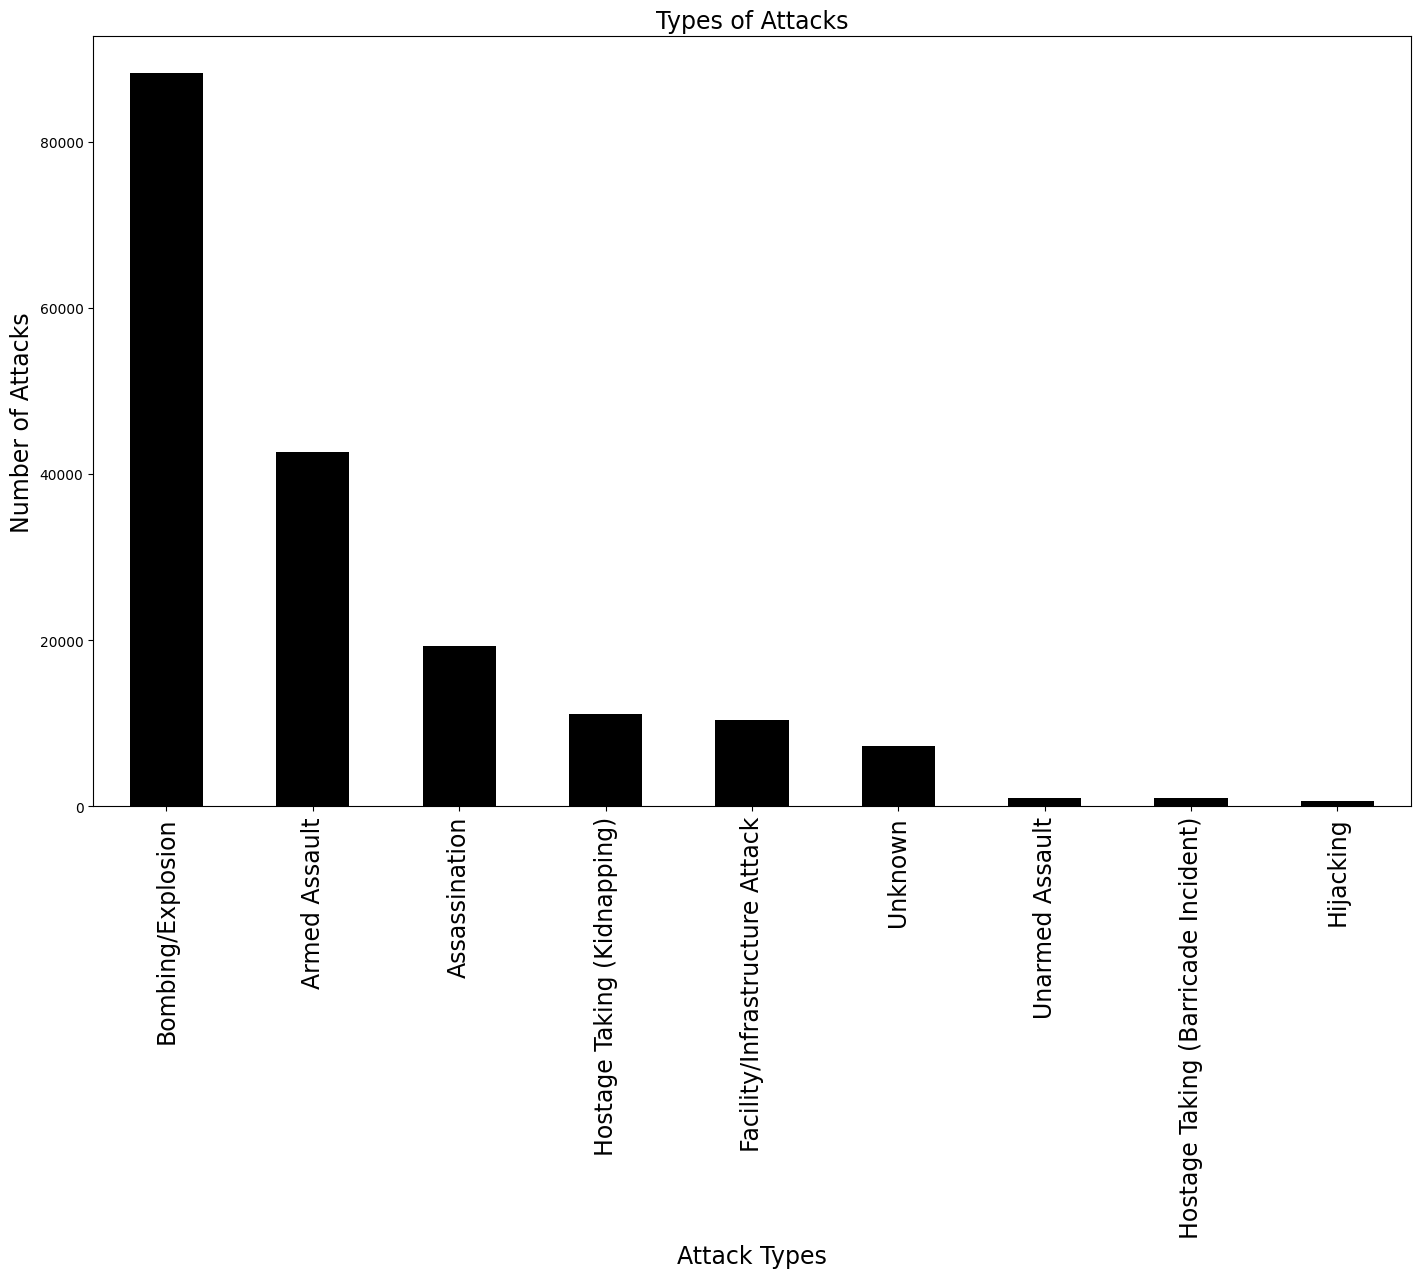

In [99]:
at.plot(kind="bar",color="black",figsize=(17,10))
plt.title("Types of Attacks",fontsize=17)
plt.xlabel("Attack Types",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Attacks",fontsize=17)
plt.show()

In [100]:
ac = df[["Attack Type","Casuality"]].groupby("Attack Type").sum().sort_values(by="Casuality",ascending=False)
ac

,Casuality
Attack Type,
Bombing/Explosion,530007.0
Armed Assault,237663.0
Unknown,47106.0
Assassination,38807.0
Hostage Taking (Kidnapping),30677.0
Hijacking,20719.0
Unarmed Assault,14907.0
Hostage Taking (Barricade Incident),8444.0
Facility/Infrastructure Attack,7407.0


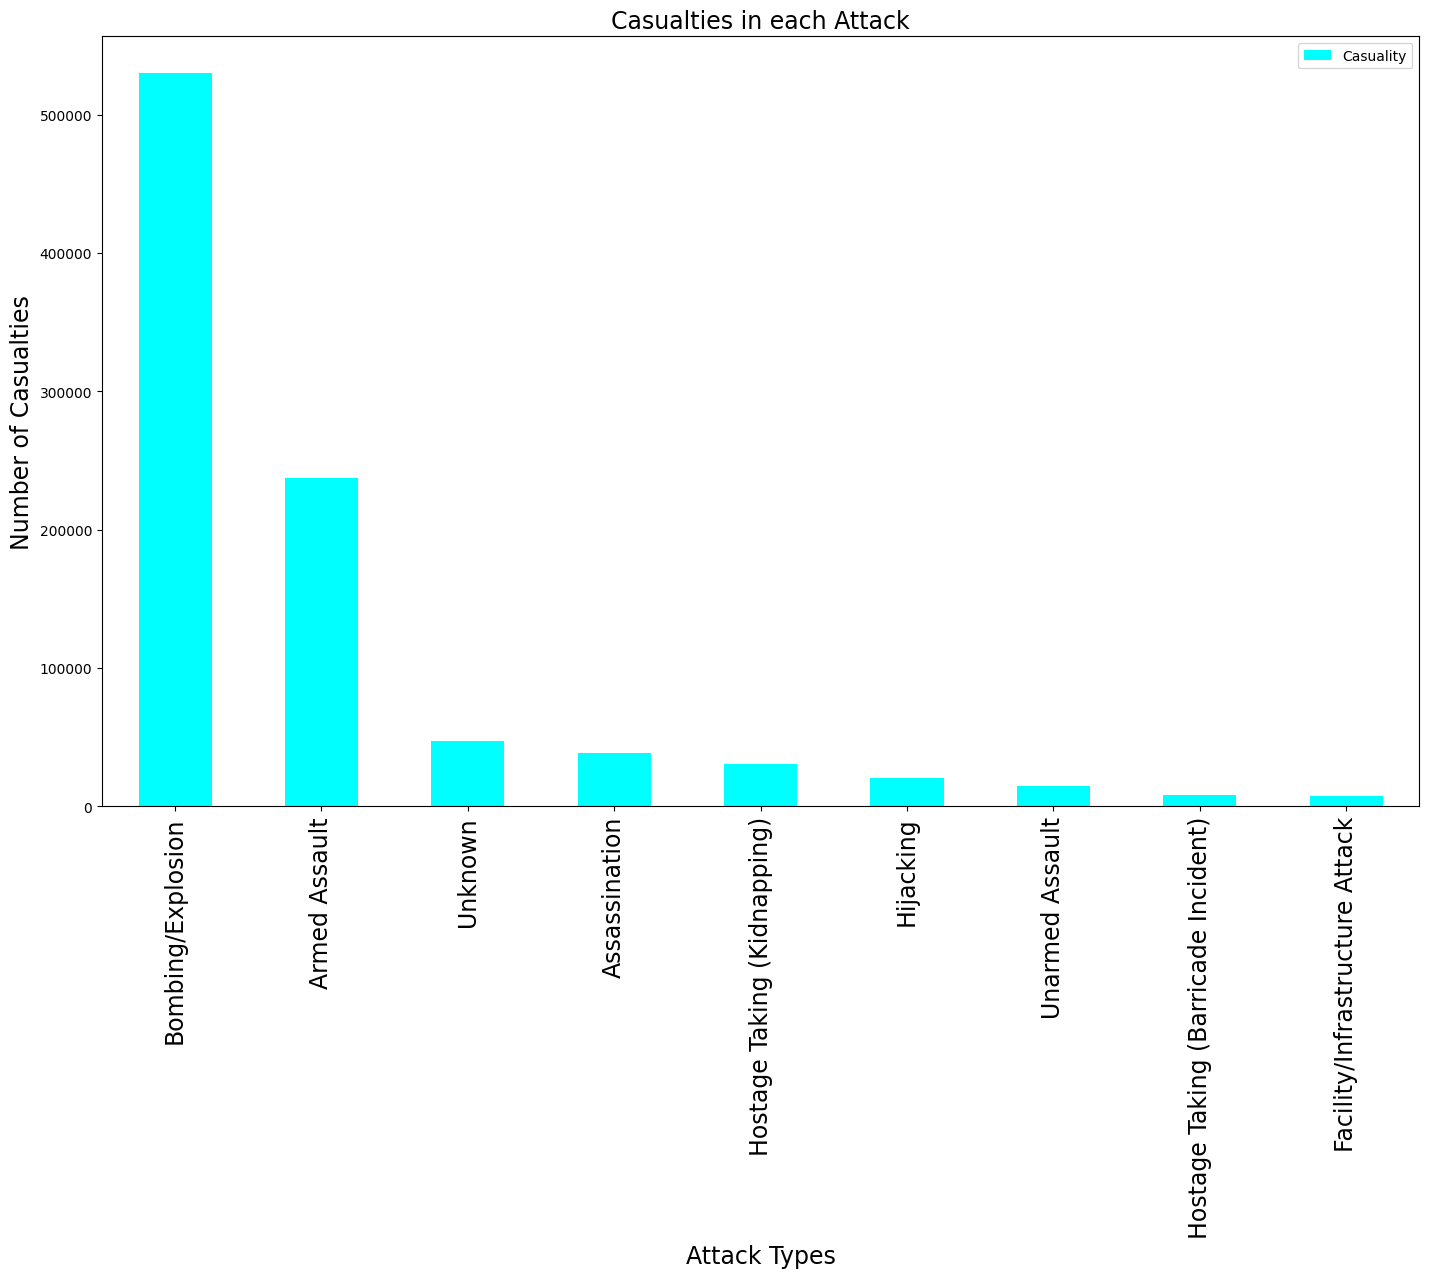

In [101]:
ac.plot(kind="bar",color="cyan",figsize=(17,10))
plt.title("Casualties in each Attack",fontsize=17)
plt.xlabel("Attack Types",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Casualties",fontsize=17)
plt.show()

## PEOPLE KILLED BY EACH ATTACK TYPE

In [105]:
attackilled = df[["Attack Type","Killed"]].groupby("Attack Type").sum().sort_values(by="Killed",ascending=False)
attackilled

,Killed
Attack Type,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


## PEOPLE WOUNDED BY EACH ATTACK TYPE

In [106]:
attackwounded = df[["Attack Type","Wounded"]].groupby("Attack Type").sum().sort_values(by="Wounded",ascending=False)
attackwounded

,Wounded
Attack Type,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


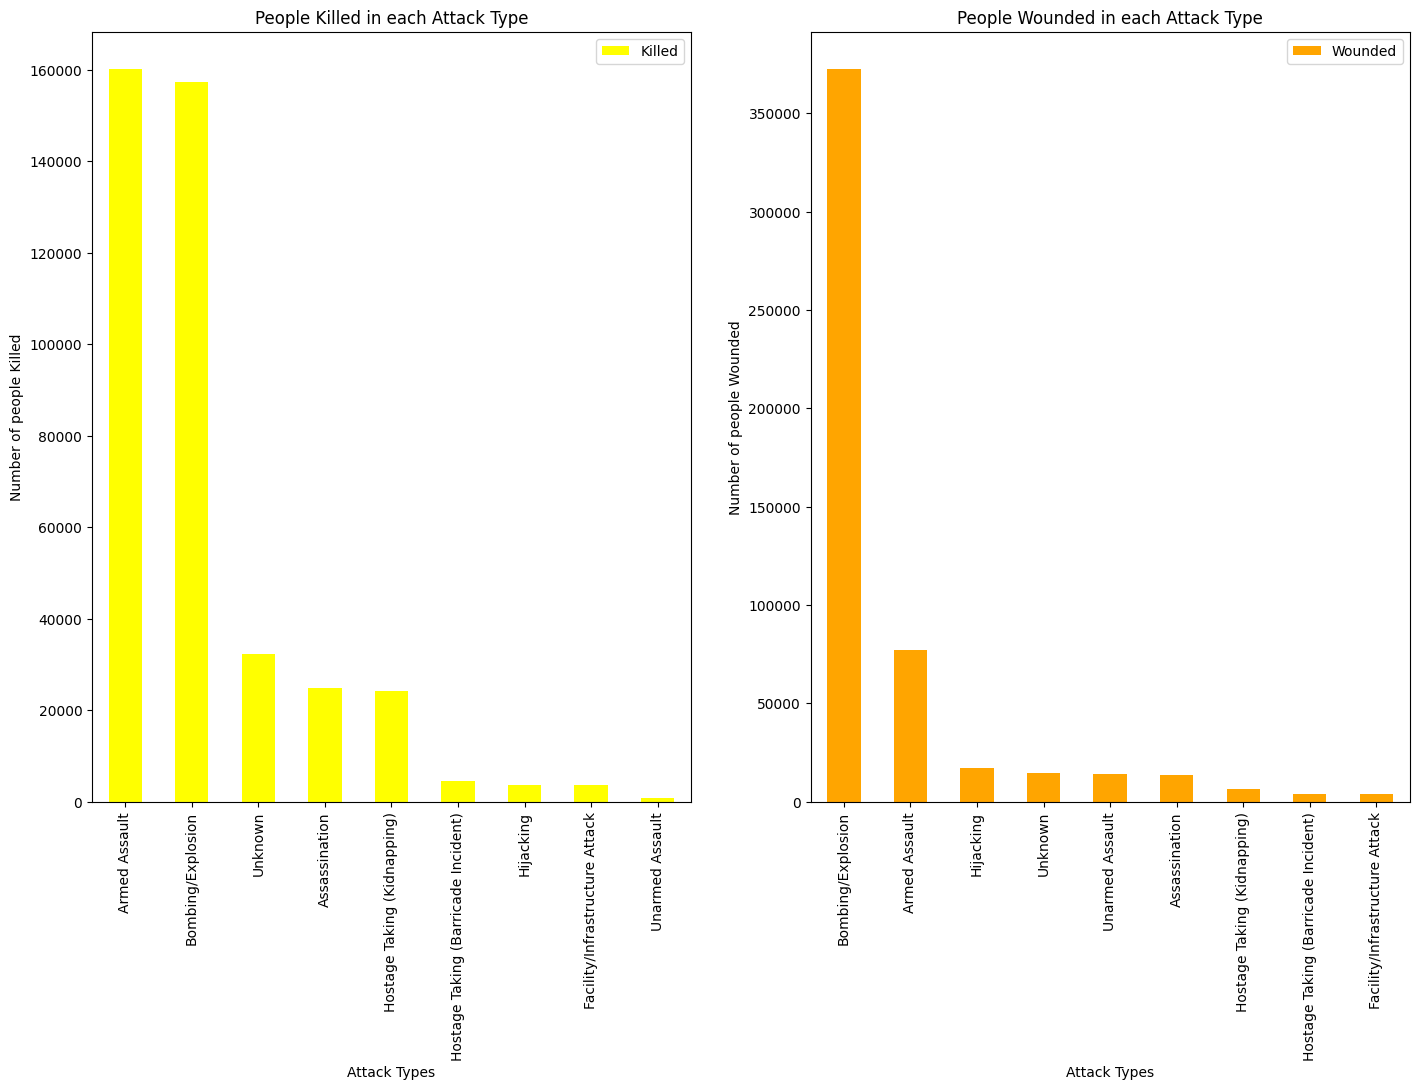

In [107]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

attackilled.plot(kind="bar",color="yellow",figsize=(17,10),ax=ax0)
ax0.set_title("People Killed in each Attack Type")
ax0.set_xlabel("Attack Types")
ax0.set_ylabel("Number of people Killed")

attackwounded.plot(kind="bar",color="orange",figsize=(17,10),ax=ax1)
ax1.set_title("People Wounded in each Attack Type")
ax1.set_xlabel("Attack Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

## TARGET TYPEWISE ATTACK ON THE PEOPLE

In [108]:
ta = df["Target Type"].value_counts()
ta

Target Type
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: count, dtype: int64

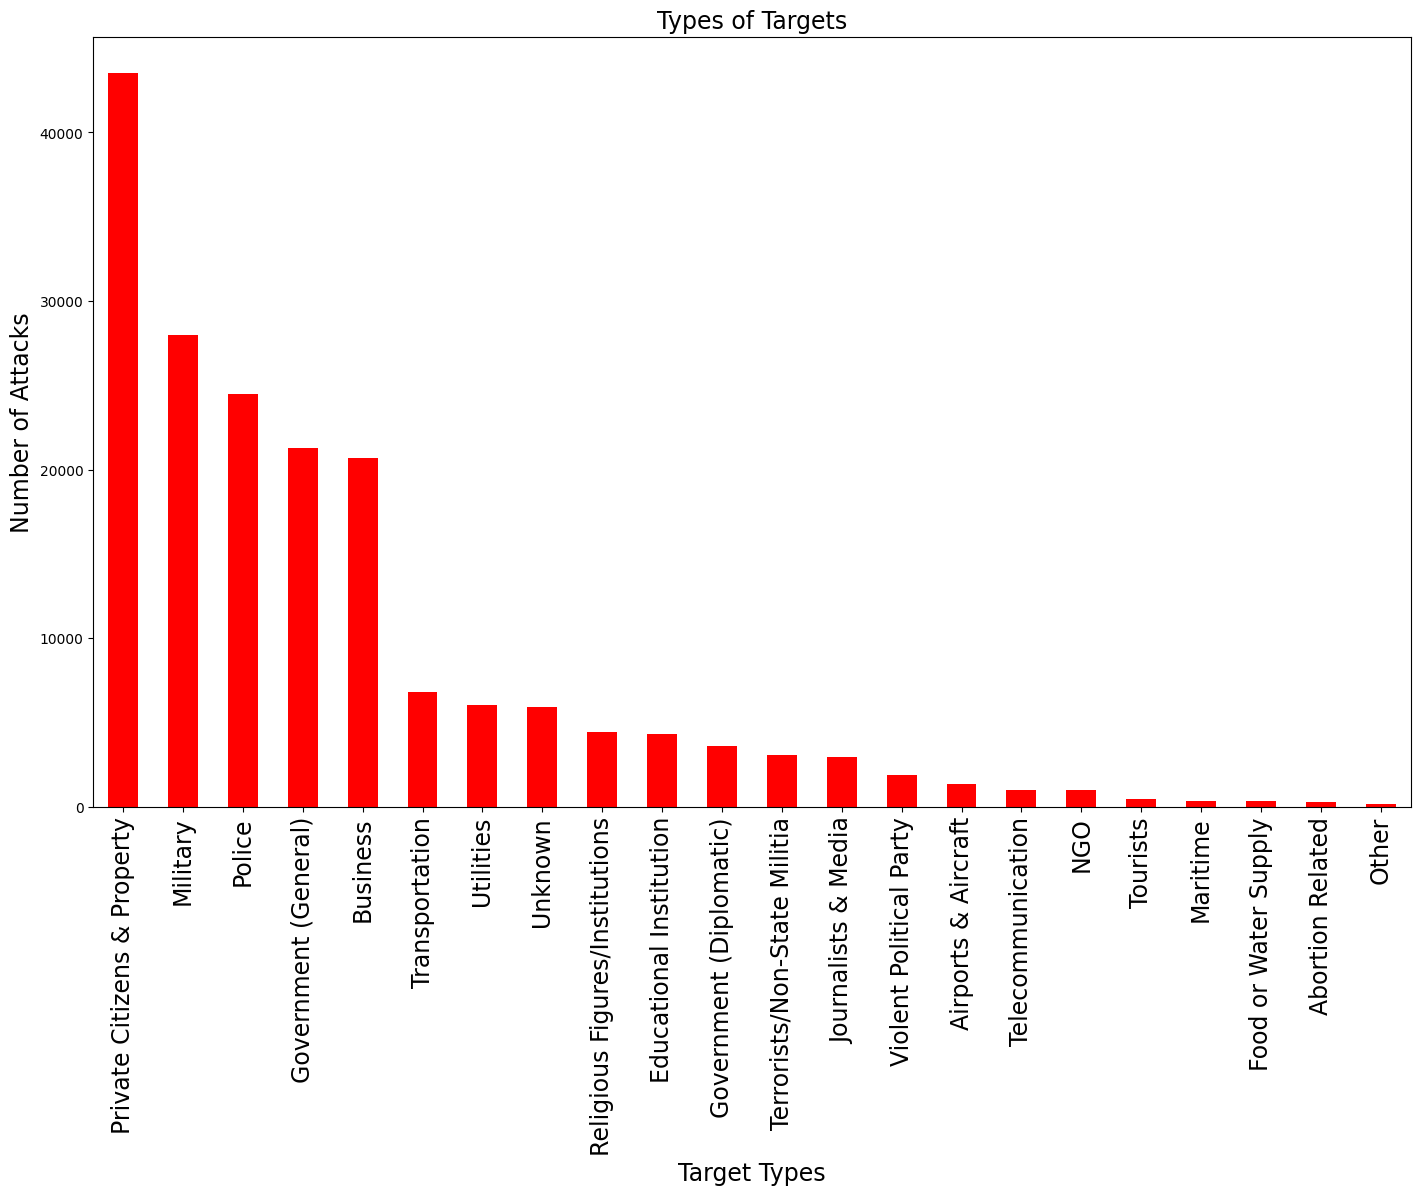

In [109]:
ta.plot(kind="bar",color="red",figsize=(17,10))
plt.title("Types of Targets",fontsize=17)
plt.xlabel("Target Types",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Attacks",fontsize=17)
plt.show()

In [110]:
tc = df[["Target Type","Casuality"]].groupby("Target Type").sum().sort_values(by="Casuality",ascending=False)
tc

,Casuality
Target Type,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


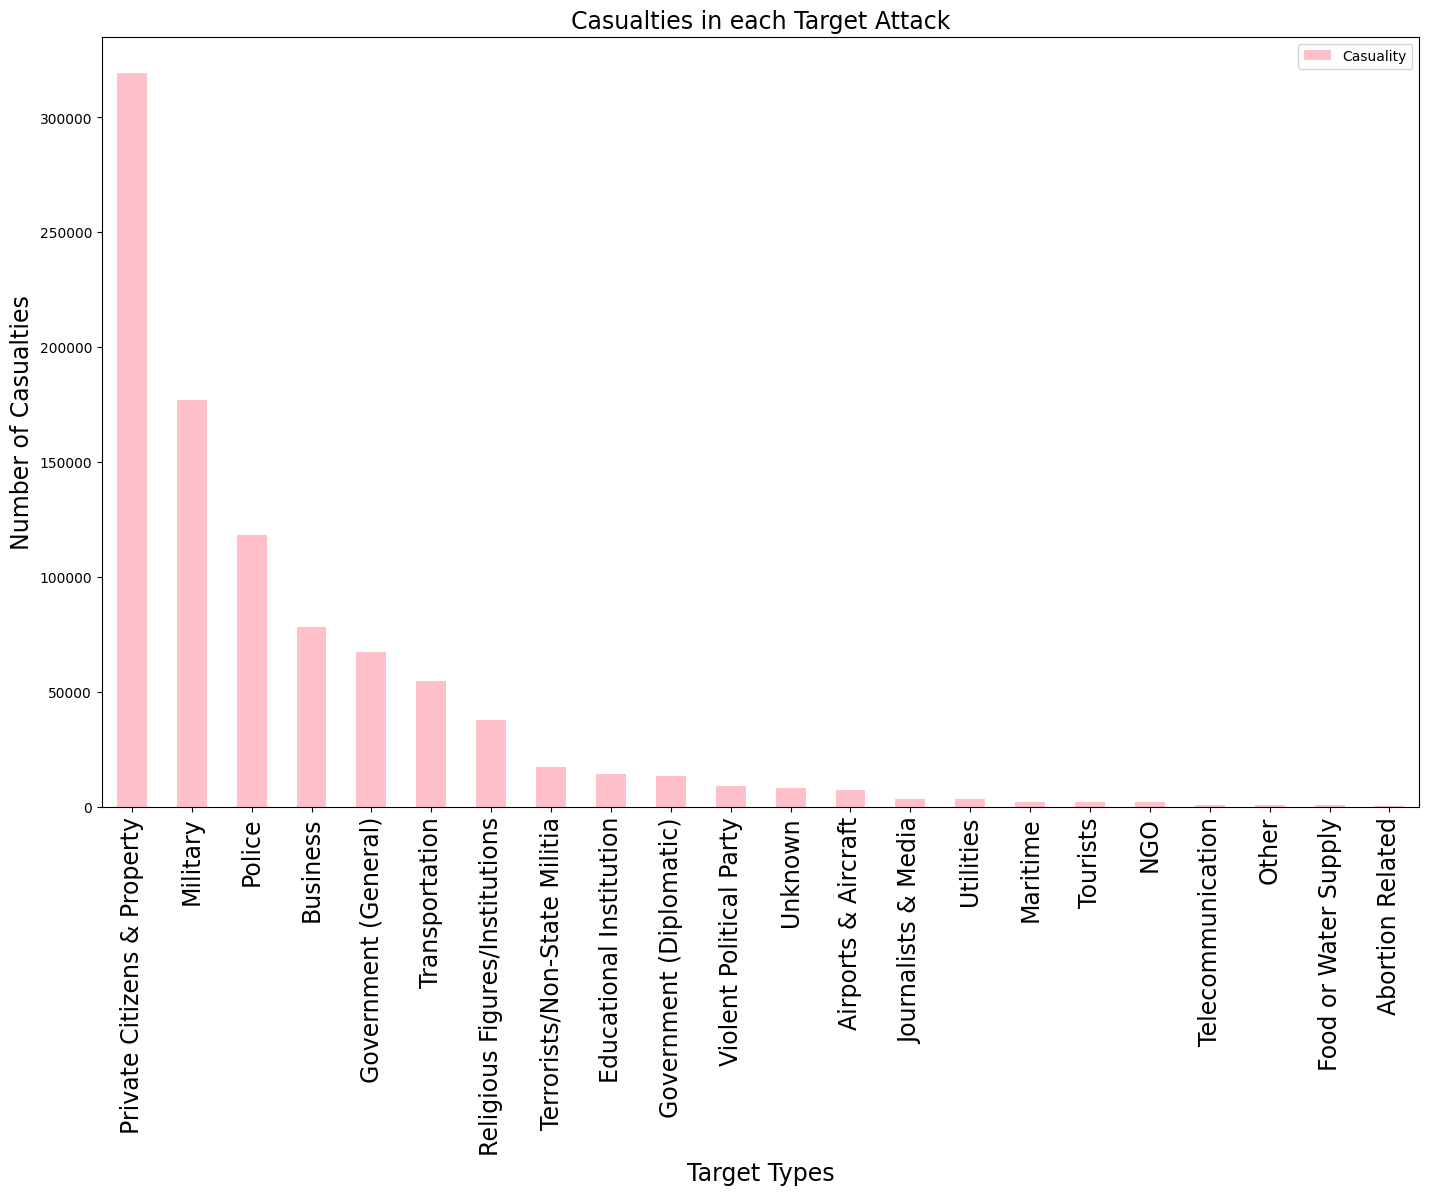

In [111]:
tc.plot(kind="bar",color="pink",figsize=(17,10))
plt.title("Casualties in each Target Attack",fontsize=17)
plt.xlabel("Target Types",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Casualties",fontsize=17)
plt.show()

## PEOPLE KILLED BY EACH TARGET TYPE

In [112]:
targetkilled = df[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
targetkilled

,Killed
Target Type,
Private Citizens & Property,140504.0
Military,106047.0
Police,53704.0
Government (General),26071.0
Business,23487.0
Transportation,13916.0
Religious Figures/Institutions,13413.0
Terrorists/Non-State Militia,9088.0
Unknown,4329.0


## PEOPLE WOUNDED BY EACH TARGET TYPE

In [113]:
targetwounded = df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
targetwounded

,Wounded
Target Type,
Private Citizens & Property,178672.0
Military,71038.0
Police,64703.0
Business,54531.0
Government (General),41184.0
Transportation,40679.0
Religious Figures/Institutions,24477.0
Government (Diplomatic),10359.0
Educational Institution,10227.0


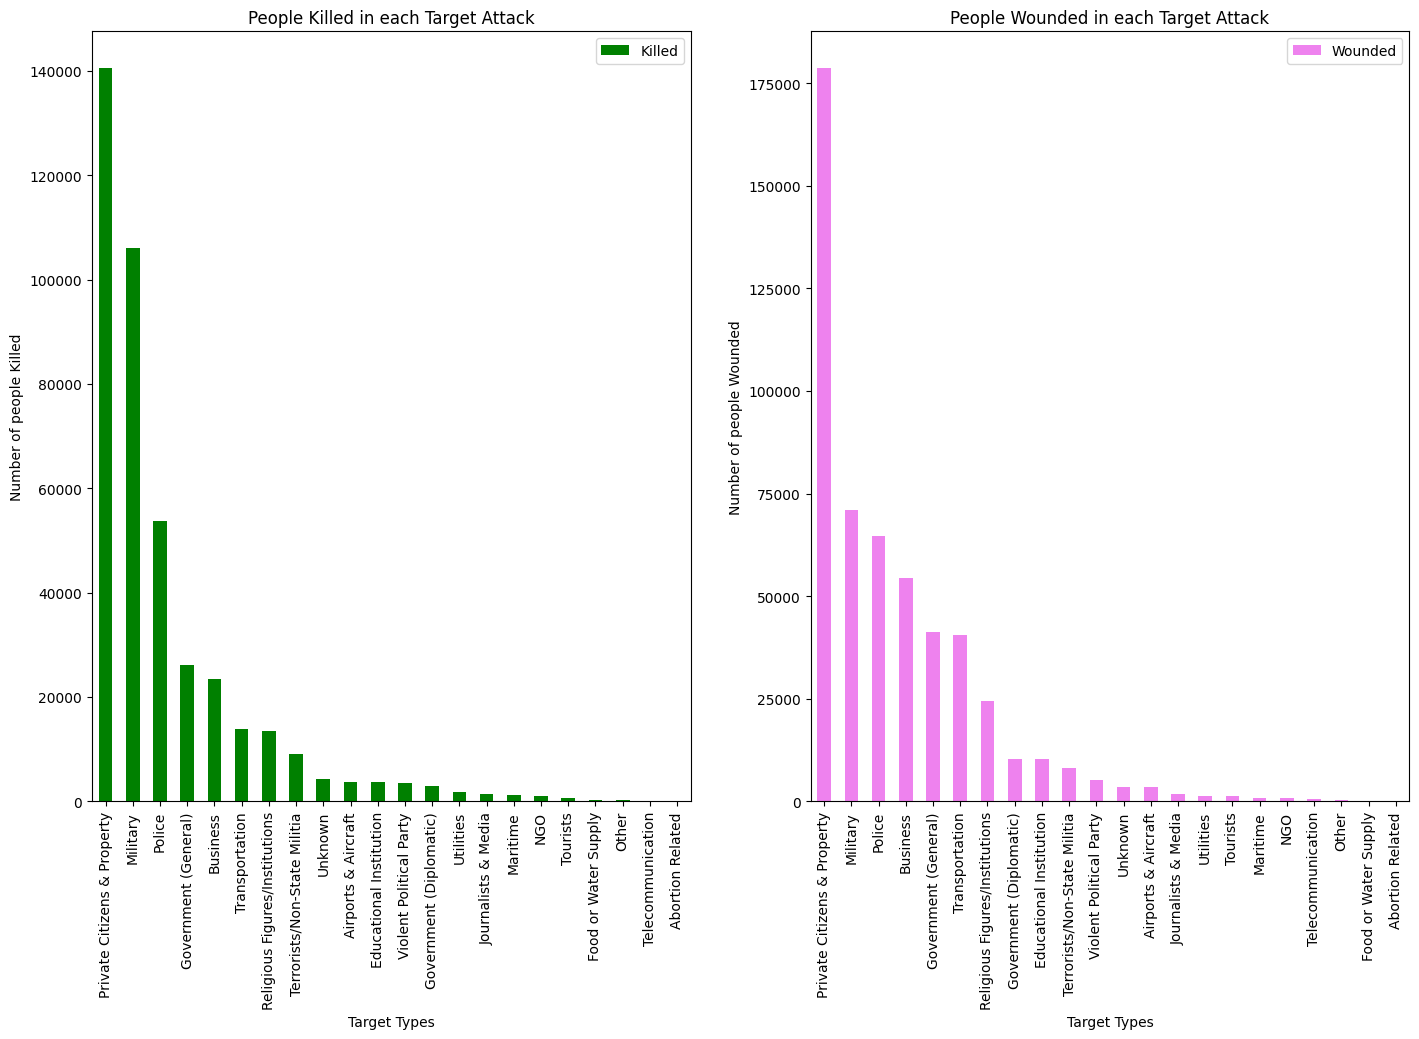

In [114]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

targetkilled.plot(kind="bar",color="green",figsize=(17,10),ax=ax0)
ax0.set_title("People Killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

targetwounded.plot(kind="bar",color="violet",figsize=(17,10),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

## GROUPWISE AND COUNTRYWISE ATTACKS ON THE PEOPLE

In [115]:
gca = df[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_22140\2138169997.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gca = df[["Group Name","Country"]].value_counts().drop("Unknown")


Group Name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
Name: count, dtype: int64

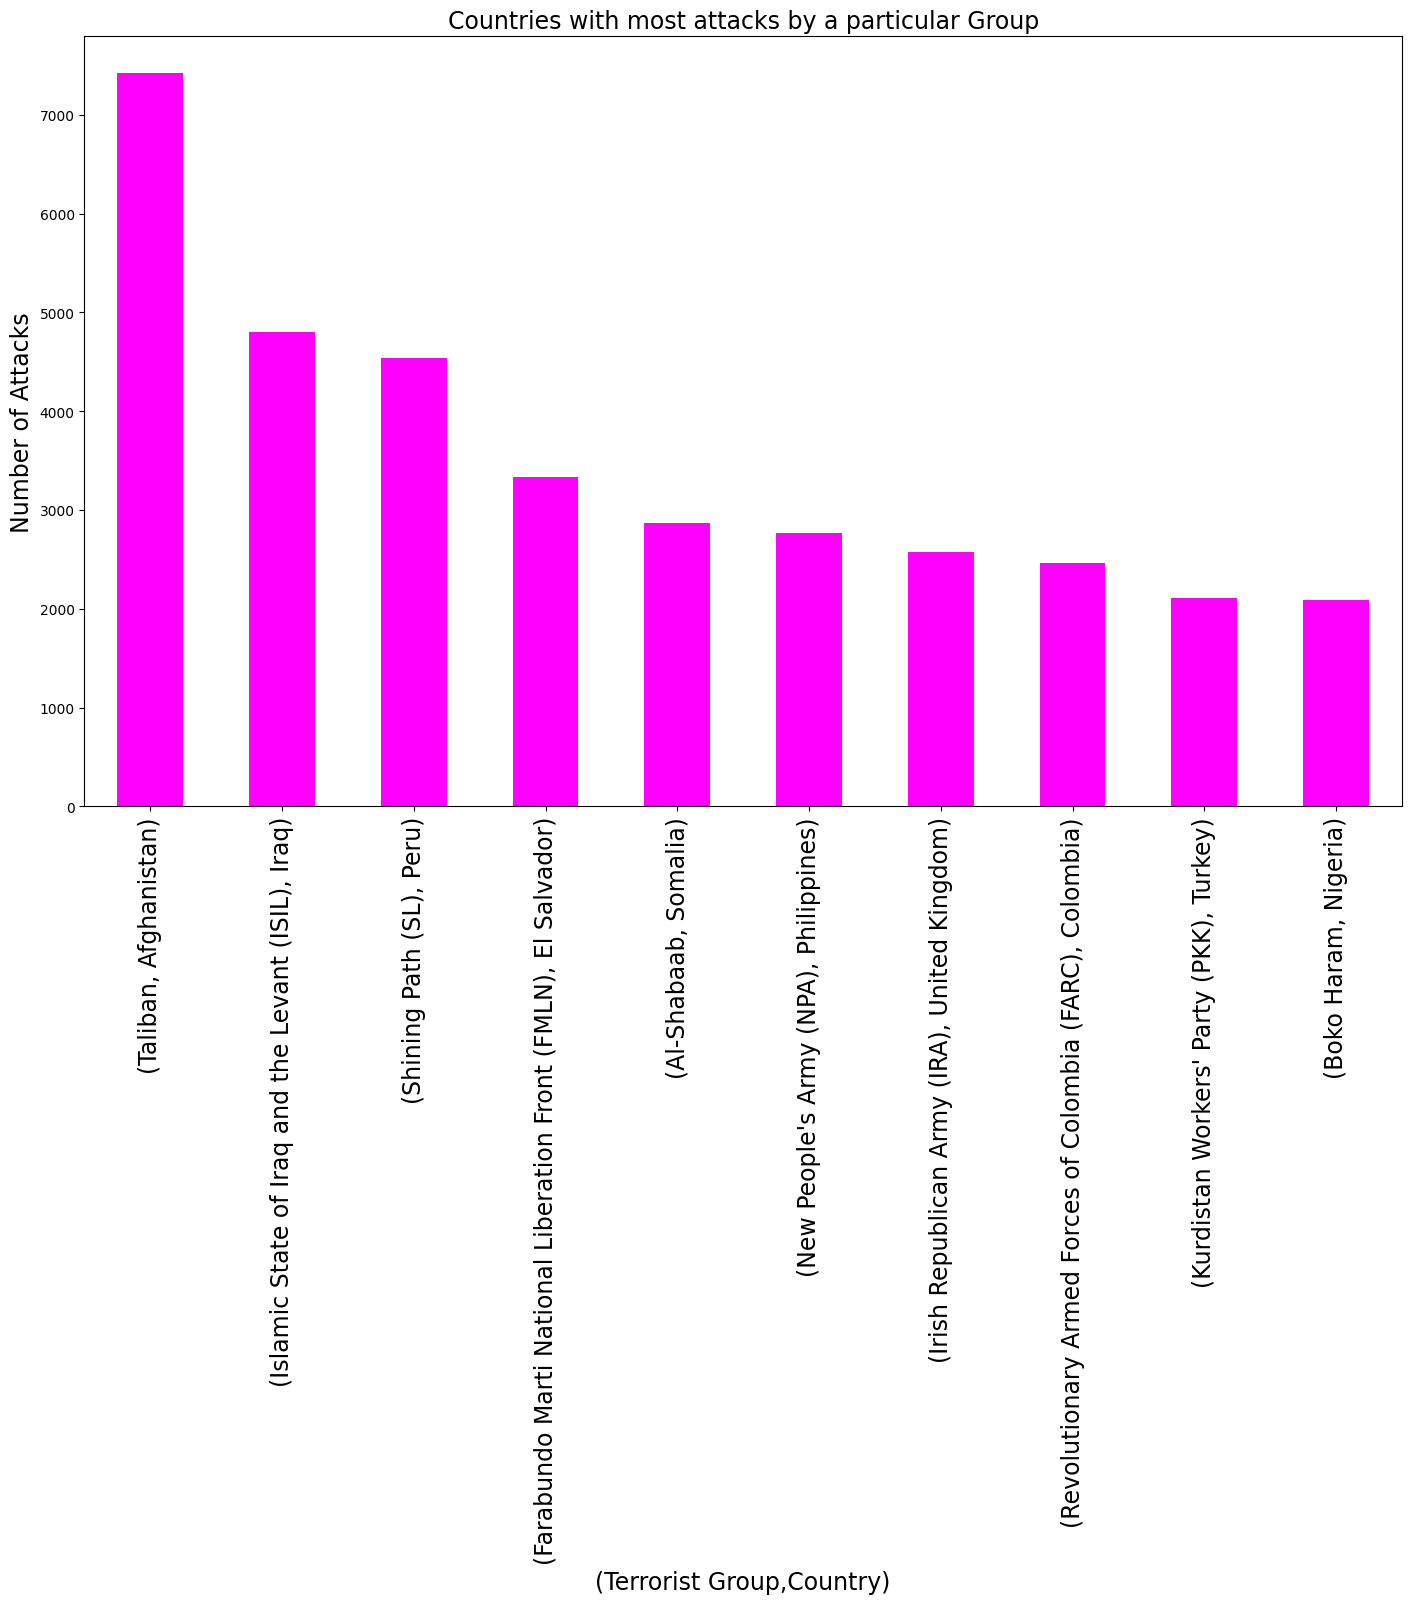

In [117]:
gca.head(10).plot(kind="bar",color="magenta",figsize=(17,10))
plt.title("Countries with most attacks by a particular Group",fontsize=17)
plt.xlabel("(Terrorist Group,Country)",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Attacks",fontsize=17)
plt.show()

In [119]:
gcc = df[["Group Name","Country","Casuality"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casuality",ascending=False).drop("Unknown").head(10)
gcc

C:\Users\user\AppData\Local\Temp\ipykernel_22140\2437148932.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  gcc = df[["Group Name","Country","Casuality"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Casuality",ascending=False).drop("Unknown").head(10)


,,Casuality
Group Name,Country,
Taliban,Afghanistan,57140.0
Islamic State of Iraq and the Levant (ISIL),Iraq,54755.0
Boko Haram,Nigeria,24588.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,21919.0
Al-Qaida,United States,19494.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,15532.0
Shining Path (SL),Peru,14625.0
Al-Qaida in Iraq,Iraq,14348.0
Al-Shabaab,Somalia,14201.0


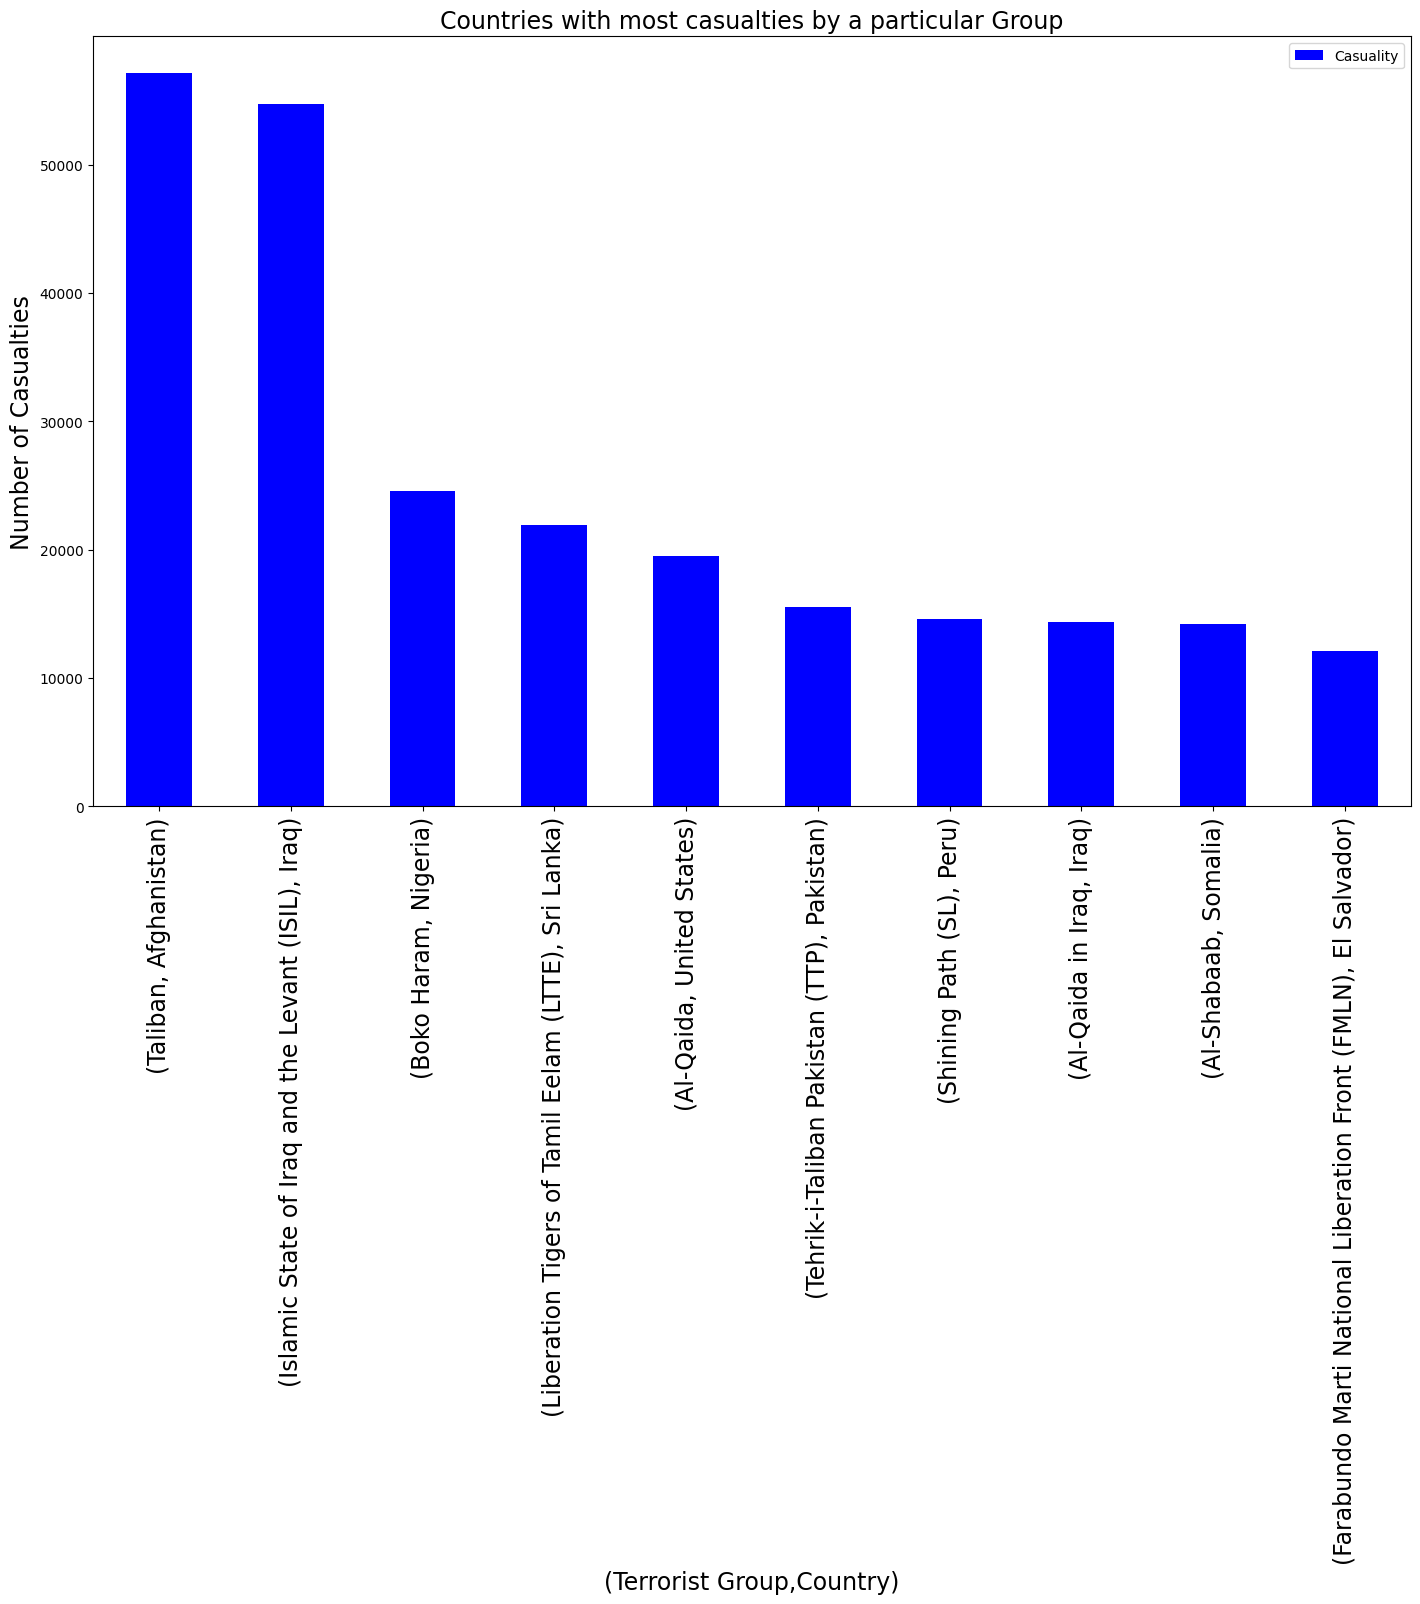

In [120]:
gcc.plot(kind="bar",color="blue",figsize=(17,10))
plt.title("Countries with most casualties by a particular Group",fontsize=17)
plt.xlabel("(Terrorist Group,Country)",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of Casualties",fontsize=17)
plt.show()

In [121]:
groupcountrykilled = df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)
groupcountrykilled

C:\Users\user\AppData\Local\Temp\ipykernel_22140\2451789759.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  groupcountrykilled = df[["Group Name","Country","Killed"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Killed",ascending=False).drop("Unknown").head(10)


,,Killed
Group Name,Country,
Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
Taliban,Afghanistan,29269.0
Boko Haram,Nigeria,16917.0
Shining Path (SL),Peru,11595.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
Al-Shabaab,Somalia,8176.0
Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
Nicaraguan Democratic Force (FDN),Nicaragua,6630.0


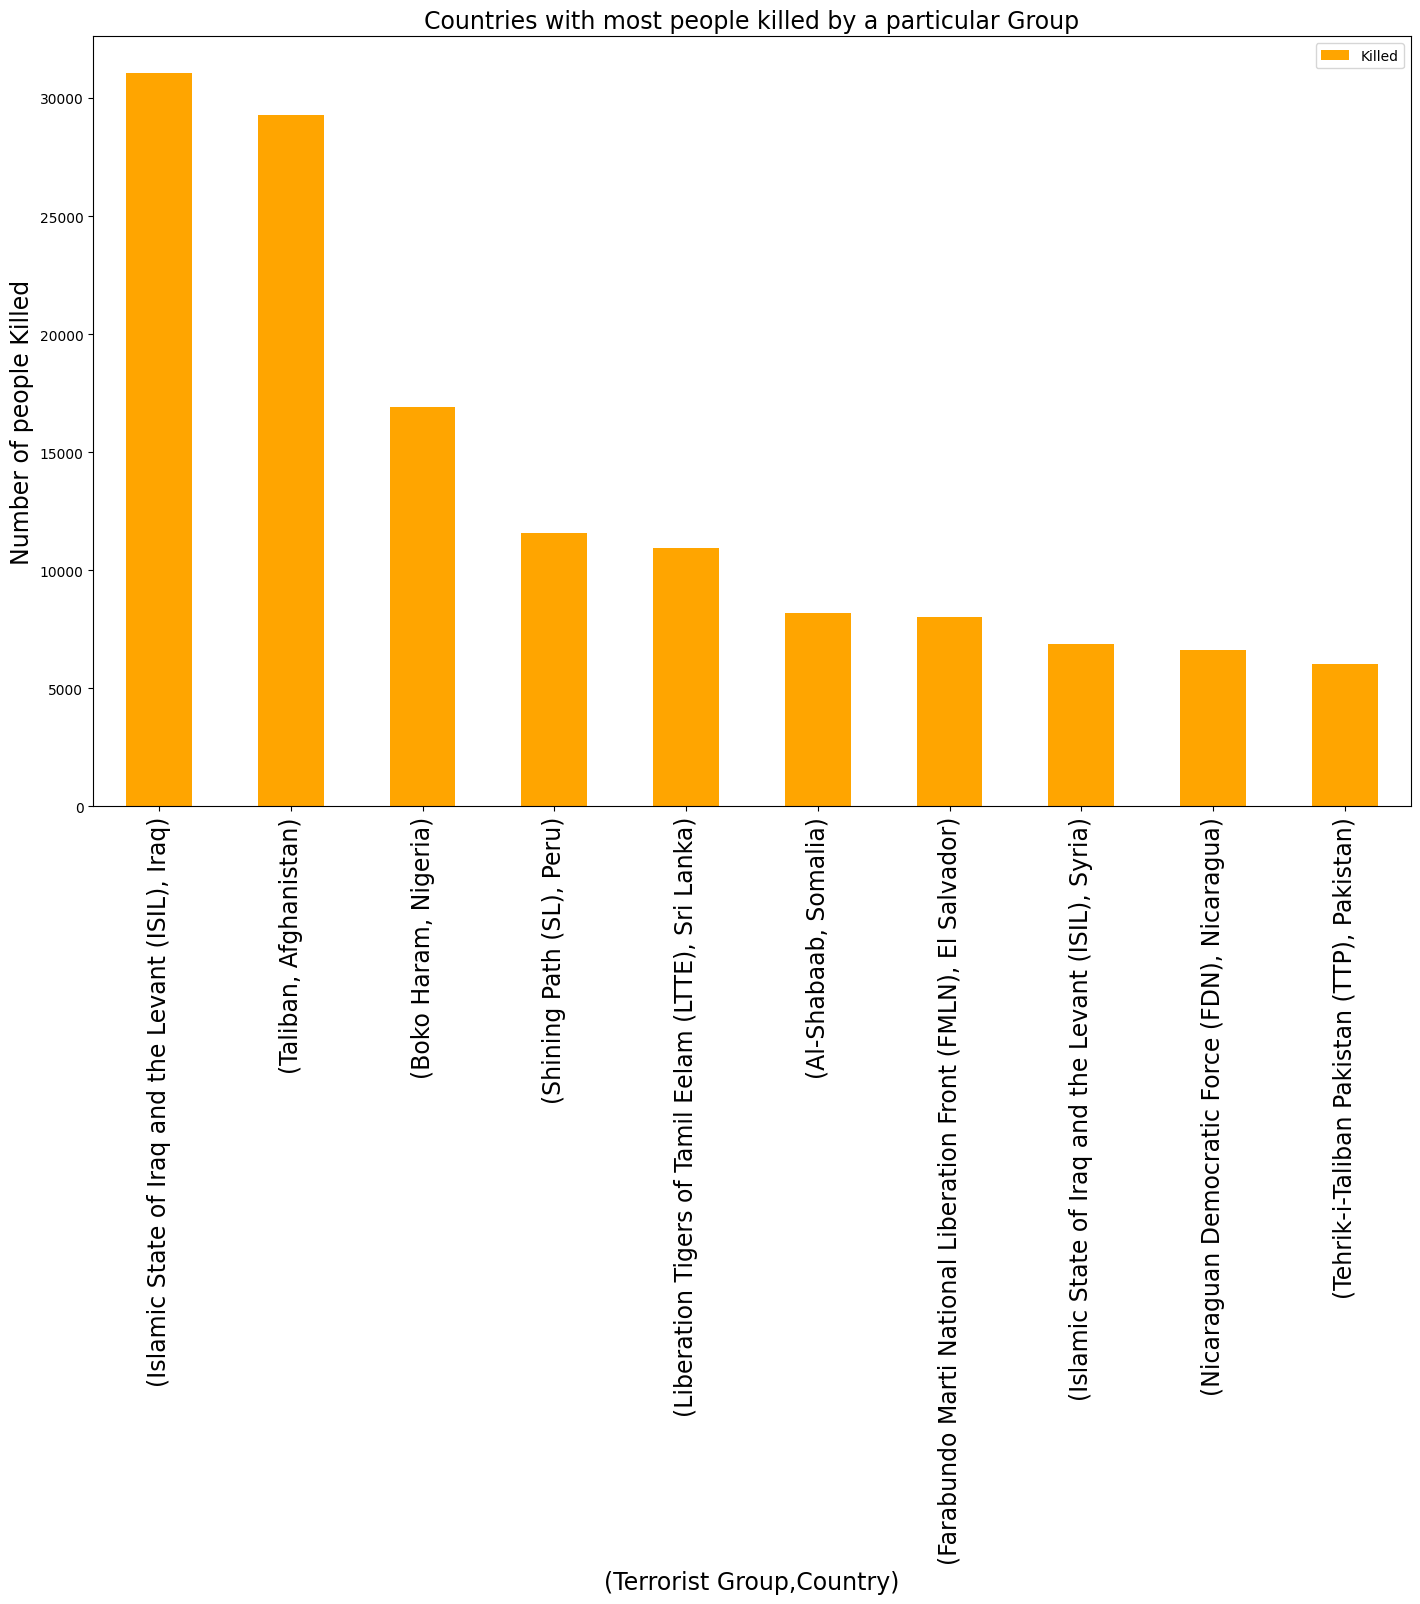

In [122]:
groupcountrykilled.plot(kind="bar",color="orange",figsize=(17,10))
plt.title("Countries with most people killed by a particular Group",fontsize=17)
plt.xlabel("(Terrorist Group,Country)",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of people Killed",fontsize=17)
plt.show()

In [123]:
groupcountrywounded=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)
groupcountrywounded

C:\Users\user\AppData\Local\Temp\ipykernel_22140\2074564403.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  groupcountrywounded=df[["Group Name","Country","Wounded"]].groupby(["Group Name","Country"],axis=0).sum().sort_values(by="Wounded",ascending=False).drop("Unknown").head(10)


,,Wounded
Group Name,Country,
Taliban,Afghanistan,27871.0
Islamic State of Iraq and the Levant (ISIL),Iraq,23697.0
Al-Qaida,United States,16493.0
Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10991.0
Al-Qaida in Iraq,Iraq,10075.0
Tehrik-i-Taliban Pakistan (TTP),Pakistan,9518.0
Boko Haram,Nigeria,7671.0
Al-Shabaab,Somalia,6025.0
Aum Shinri Kyo,Japan,6003.0


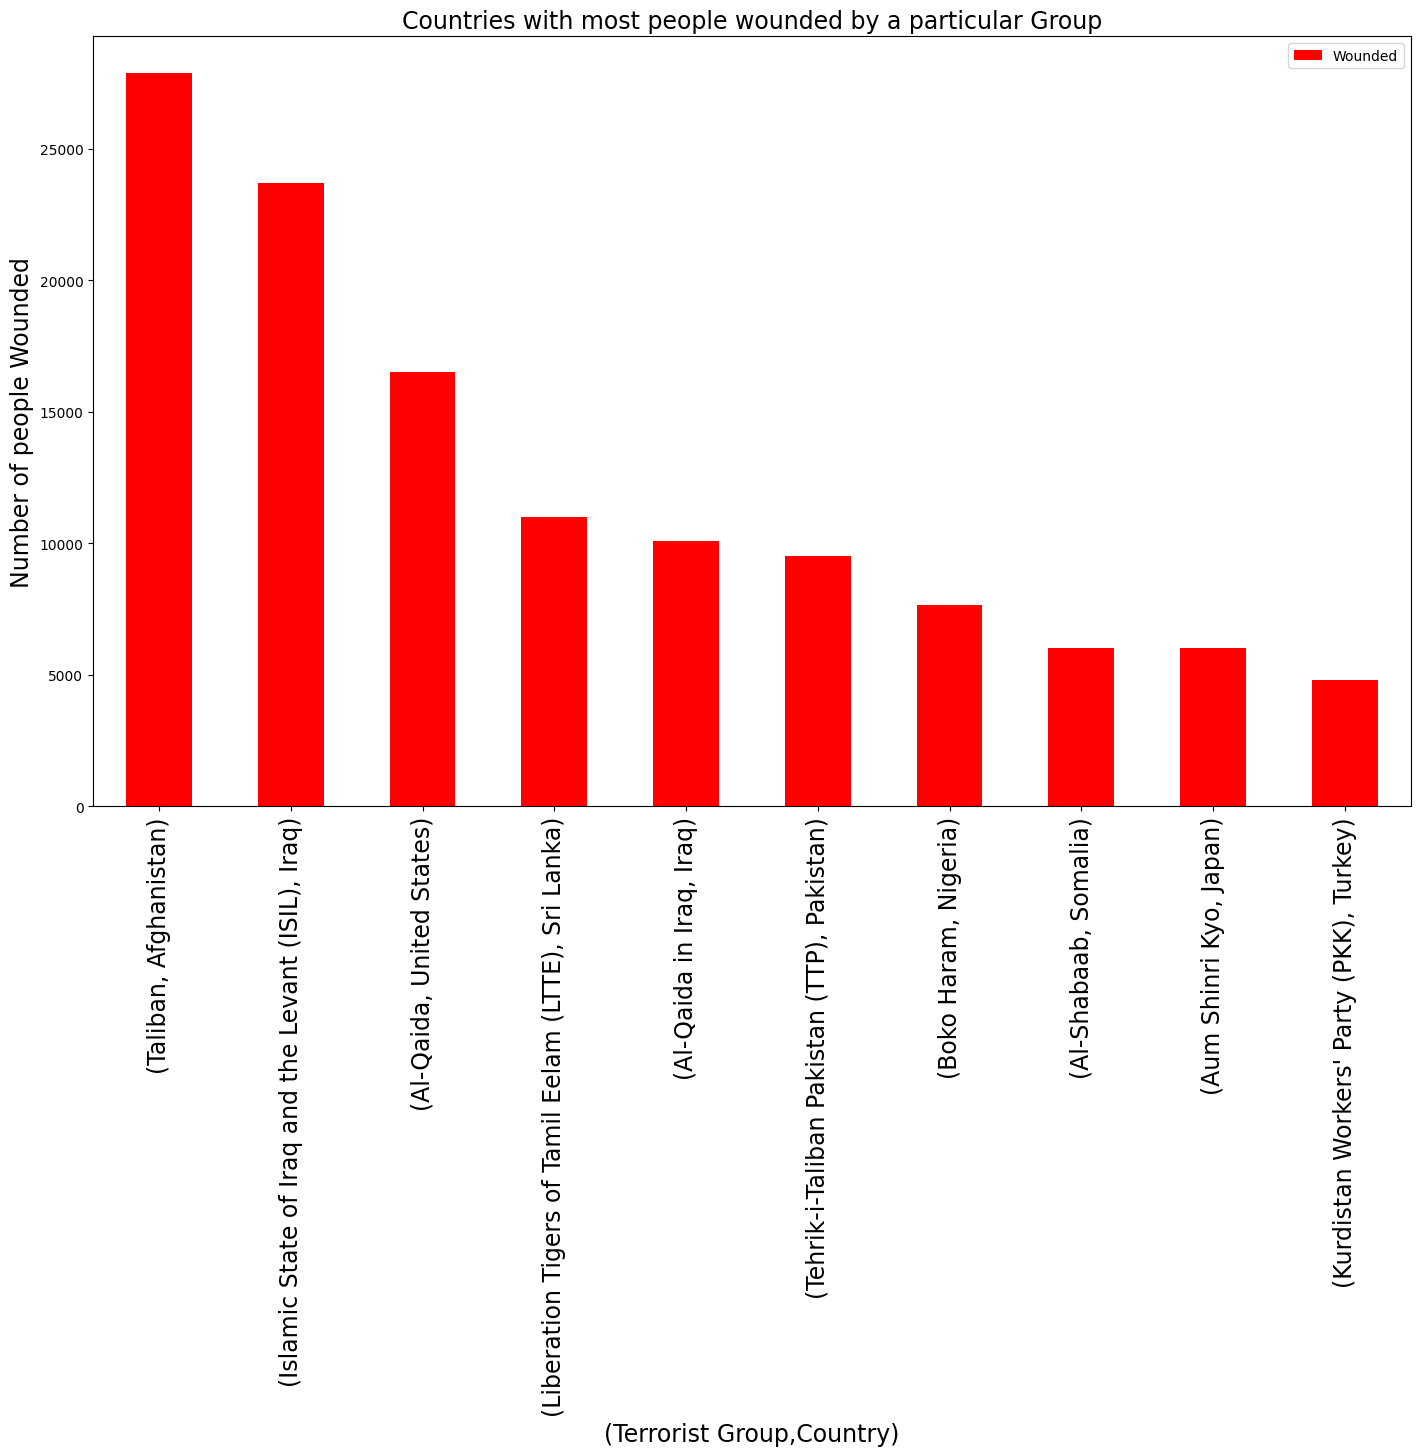

In [124]:
groupcountrywounded.plot(kind="bar",color="red",figsize=(17,10))
plt.title("Countries with most people wounded by a particular Group",fontsize=17)
plt.xlabel("(Terrorist Group,Country)",fontsize=17)
plt.xticks(fontsize=17)
plt.ylabel("Number of people Wounded",fontsize=17)
plt.show()

## THE NET EFFECT ON THE HUMANITY DUE TO THE TERRORIST ATTACK FROM THE YEAR 1970 TO THE YEAR 2017 ACROSS THE WORLD ARE 

In [126]:
casuality=df.loc[:,"Casuality"].sum()
print("Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :\n",casuality)

kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

wound=df.loc[:,"Wounded"].sum()
print("Total number of people wounded due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of Casualties due to Terrorist Attacks from 1970 to 2017 across the world :
 935737.0
Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 411868.0
Total number of people wounded due to Terrorist Attacks from 1970 to 2017 across the world :
 523869.0
